<a href="https://colab.research.google.com/github/Rh-RAP/Analisis_emisiones_CO2/blob/main/TFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1><br> PROYECTO FINAL DE MÁSTER DATA SCIENCE</h1></br>
<h2><br> Análisis de las emisiones de CO2 y CO2eq en la producción de alimentos y posibles soluciones </h2></br> 

<ul>
    <li>Rhuana Reis</li>
    <li>Leonardo Romero</li>
</ul>



<p>En el presente trabajo vamos a analizar las emisiones de CO2/CO2eq que se generan en parte de la producción de los alimentos que consumimos. Nos vamos a enfocar en los productos de mayor emisión tanto en el área agrícola como en la de la ganadería. Finalmente ofreceremos conclusiones y algunos datos que pueden complementar las conclusiones o dar pie a futuros trabajos </p>

In [ ]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns 
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot, plot_components
import logging
import os

<h1><b>Análisis General</b></h1>
<br>
<ul><li> El objetivo de este análisis es identificar los productos que emiten más CO2, con el objetivo de medir el impacto de la producción de estos productos y encontrar una opción que contaminante menos, para el consumo de la población.</li>
<li>Utilizaremos como base los indicadores de Cuotas del IPCC, que promedia las emisiones entre 1990 y 2020, donde establece que el 51,7% de las emisiones de CO2 provienen de la fermentación entérica y el 12,10% de la producción de arroz</li></ul>

In [ ]:
#Intensidad de emisiones 
df_emisiones = pd.read_csv('Intensidad_emissiones_2.csv')

# Emisiones por Combustion de Residuos Agriculas
# df_combustion = pd.read_csv('/content/drive/MyDrive/Data/Agricultura_Emisiones_Combustion_Residuos_Agricolas (1).csv')
df_combustion_poblacion = pd.read_csv('Combustion_Poblacion.csv')

# Cultivos Agricultura y Pecuaria
df_Cultivos_Poblacion = pd.read_csv('Cultivos_Ganaderia_Poblacion.csv')

# Emision por eliminacion de desechos
# df_desechos = pd.read_csv('/content/drive/MyDrive/Data/Agricultura_Eliminacion_Desechos.csv')
# df_desechos_poblacion = pd.read_csv('/content/drive/MyDrive/Data/Desechos_Poblacion.csv')

<h2><b>Emisiones Totales </b></h2>

<p>Análisis a nivel mundial</p>

In [ ]:
df_intensidad_emisiones_mundo = df_emisiones.loc[df_emisiones.Área == 'Mundo']

In [ ]:
# Análisis solamente con las emisiones 
df_emisiones_mundo = df_intensidad_emisiones_mundo.loc[df_intensidad_emisiones_mundo.Elemento == 'Emisiones (CO2eq) (AR5)']
df_en_mundo= df_emisiones_mundo.copy()

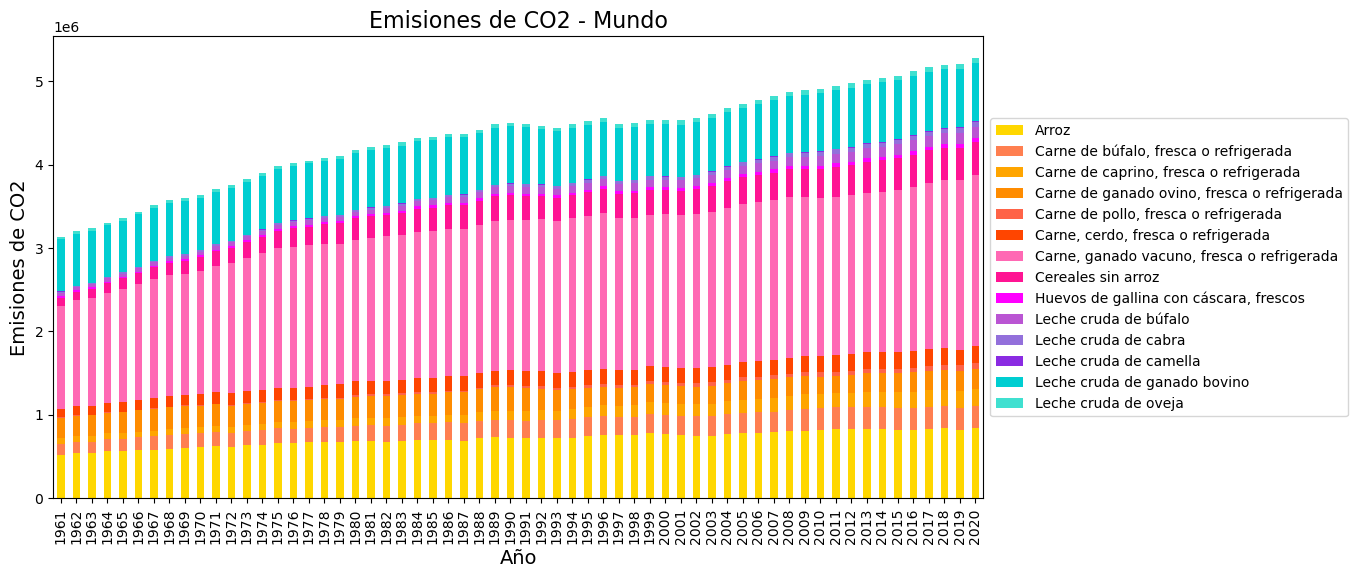

In [ ]:
#Creando pivot table
pivot_emisiones_mundo = df_en_mundo.pivot(index='Año', columns='Producto', values='Valor')

# definir uma paleta de cores adequada
my_palette = ["#FFD700", "#FF7F50", "#FFA500", "#FF8C00", "#FF6347", "#FF4500",
              "#FF69B4", "#FF1493", "#FF00FF", "#BA55D3", "#9370DB", "#8A2BE2",
              "#00CED1", "#40E0D0", "#00BFFF"]

# criar o gráfico de barras empilhadas com a paleta de cores definida
ax = pivot_emisiones_mundo.plot(kind='bar', stacked=True, color = my_palette)

# adicionar legenda com fonte maior
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# adicionar rótulos dos eixos com fonte maior
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Emisiones de CO2', fontsize=14)

# adicionar título com fonte maior
ax.set_title('Emisiones de CO2 - Mundo', fontsize=16)

# ajustar o tamanho da figura
plt.gcf().set_size_inches(12, 6)

# mostrar o gráfico
plt.show()

<p> El gráfico muestra todas las emisiones de CO2 generadas por la producciõn de alimentos y cuánto se debe a cada producto por separado. De él se deduce que los productos responsables del mayor porcentaje de emisiones son : La Carne de ganado de vacuno, el arroz y la leche de ganado vacuno</p>

In [ ]:
# Ahora veremos el valor en términos porcentuales de cada uno de estos productos en las emisiones totales 

df_en_mundo = pivot_emisiones_mundo.reset_index() # Pivot table to Data Frame
df_en_mundo['Total Emisiones CO2'] = df_en_mundo.sum(axis=1) #crear una columna con el total de emisiones

#Crear Columnas con el porcetaje de emisiones por la producción de Arroz, Carne de Vacuna y Leche Bovina
df_en_mundo['porcentaje_arroz'] = df_en_mundo['Arroz']*100/df_en_mundo['Total Emisiones CO2']
df_en_mundo['porcentaje_carne_vacuna'] = df_en_mundo['Carne, ganado vacuno, fresca o refrigerada']*100/df_en_mundo['Total Emisiones CO2']
df_en_mundo['porcentaje_leche_bovino'] = df_en_mundo['Leche cruda de ganado bovino']*100/df_en_mundo['Total Emisiones CO2']

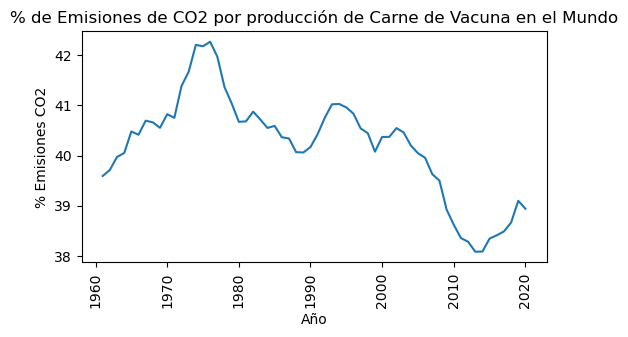

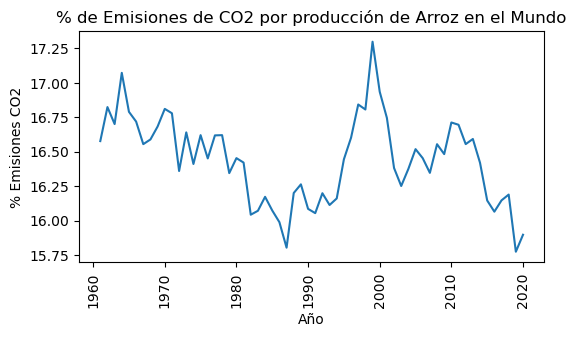

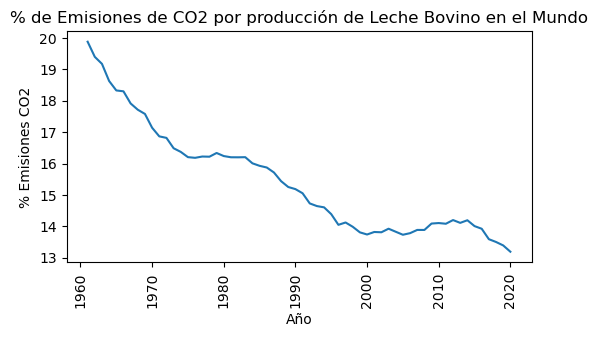

In [ ]:
# Gráficos con porcentaje de emisiones de CO2

#Carne Vacuna
plt.figure(figsize=(6,3))
sns.lineplot(data = df_en_mundo , x = 'Año', y= 'porcentaje_carne_vacuna')
plt.xlabel('Año')
plt.ylabel('% Emisiones CO2')
plt.title('% de Emisiones de CO2 por producción de Carne de Vacuna en el Mundo')
plt.xticks(rotation = 90)

#Arroz
plt.figure(figsize=(6,3))
sns.lineplot(data = df_en_mundo , x = 'Año', y= 'porcentaje_arroz')
plt.xlabel('Año')
plt.ylabel('% Emisiones CO2')
plt.title('% de Emisiones de CO2 por producción de Arroz en el Mundo')
plt.xticks(rotation = 90)

#Leche Bovino
plt.figure(figsize=(6,3))
sns.lineplot(data = df_en_mundo , x = 'Año', y= 'porcentaje_leche_bovino')
plt.xlabel('Año')
plt.ylabel('% Emisiones CO2')
plt.title('% de Emisiones de CO2 por producción de Leche Bovino en el Mundo')
plt.xticks(rotation = 90)



plt.show()

<p> · Como se puede observar en los gráficos y DF la producción de Arroz (15,9%), Leche de Vacuno (13,19%) y Carne de Vacuno (38,95%) fueron responsables del 67,99% de las emisiones de CO2 en 2020.</p>

<p> ·Otra observación importante es que el porcentaje de emisiones generadas por la producción de leche de vaca muestra una tendencia negativa. Esto demuestra que, aunque sigue desempeñando un papel importante, su contribución a las emisiones globales ha ido disminuyendo.</p>

<h2><b>Arroz</b></h2>

<h3><b>Cultivos</b></h3>

In [ ]:
df_Cultivos_arroz = df_Cultivos_Poblacion.loc[df_Cultivos_Poblacion.producto =='Arroz, cascara']

<h3>Análisis mundial y por continente</h3>

In [ ]:
continentes = ['África', 'Américas', 'Asia', 'Europa', 'Oceanía']

df_Cultivos_arroz_mundo = df_Cultivos_arroz.loc[(df_Cultivos_arroz.elemento == 'Producción') & (df_Cultivos_arroz.area == 'Mundo')]
df_Cultivos_arroz_prod = df_Cultivos_arroz.loc[(df_Cultivos_arroz.elemento == 'Producción') & (df_Cultivos_arroz.area.isin(continentes))]

In [ ]:
df_Cultivos_arroz.elemento.unique()

array(['Área cosechada', 'Rendimiento', 'Producción'], dtype=object)

<p>Analizamos la producción de arroz a lo largo de los años</p>

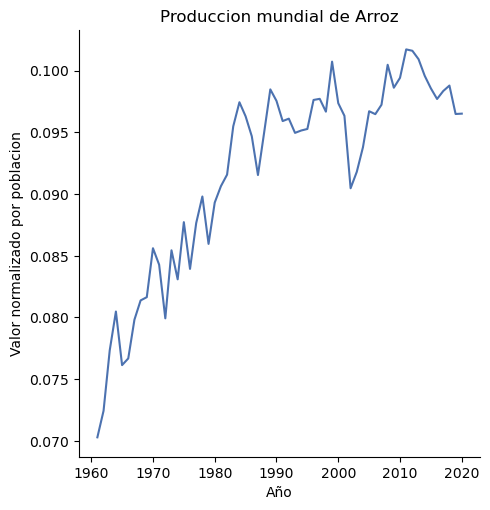

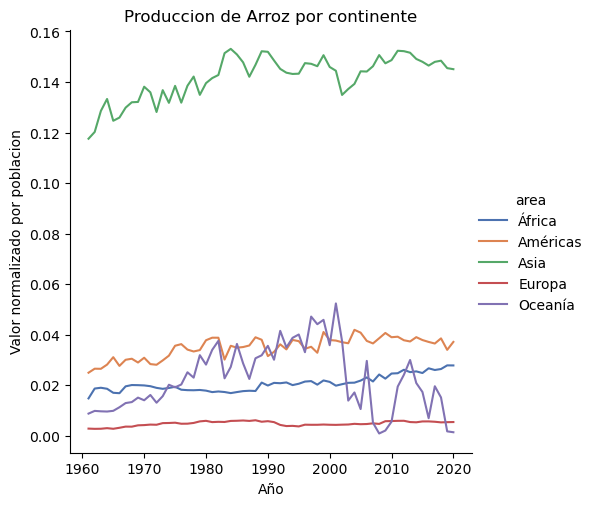

In [ ]:
sns.set_palette("deep")
sns.relplot(data = df_Cultivos_arroz_mundo, x = 'año', y= 'valor_normalizado', kind = 'line')
plt.xlabel('Año')
plt.ylabel('Valor normalizado por poblacion')
plt.title('Produccion mundial de Arroz')

sns.relplot(data = df_Cultivos_arroz_prod, x = 'año', y= 'valor_normalizado', hue= 'area', kind = 'line')
plt.xlabel('Año')
plt.ylabel('Valor normalizado por poblacion')
plt.title('Produccion de Arroz por continente')

plt.show()

<p> Como puede verse, la producción mundial de arroz ha crecido más que la población, y Asia es el continente que más arroz produce.</p>

## Emisiónes 

<p> Relación de las emisiones con las demás variables </p>

In [ ]:
df_emision_arroz= df_emisiones.loc[(df_emisiones.Producto == 'Arroz') & (df_emisiones.Elemento == 'Emisiones (CO2eq) (AR5)')]
df_emision_arroz_mundo = df_emision_arroz.loc[df_emision_arroz.Área == 'Mundo']
df_Cultivos_arroz_area = df_Cultivos_arroz.loc[(df_Cultivos_arroz.elemento == 'Área cosechada') & (df_Cultivos_arroz.area.isin(continentes))]
df_emission_arroz_cont = df_emision_arroz.loc[df_emision_arroz.Área.isin(continentes)]

#Creando la columna del valor normalizado de las emisiones
df_cultivos_arroz_mundo_prod= df_Cultivos_arroz_mundo.loc[(df_Cultivos_arroz.area == 'Mundo') & (df_Cultivos_arroz_mundo.elemento == 'Producción')]
df_cultivos_arroz_mundo_prod.reset_index(inplace = True)
df_emision_arroz_mundo.reset_index(inplace = True)
df_emision_arroz_mundo['poblacion'] = df_cultivos_arroz_mundo_prod['poblacion']
df_emision_arroz_mundo['valor_normalizado'] =df_emision_arroz_mundo['Valor'] / df_emision_arroz_mundo['poblacion']

C:\Users\Rhuana Reis\AppData\Local\Temp\ipykernel_10896\2419813623.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emision_arroz_mundo['poblacion'] = df_cultivos_arroz_mundo_prod['poblacion']
C:\Users\Rhuana Reis\AppData\Local\Temp\ipykernel_10896\2419813623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emision_arroz_mundo['valor_normalizado'] =df_emision_arroz_mundo['Valor'] / df_emision_arroz_mundo['poblacion']


+ Graficós con las Emisiones mundiales de CO2, valores reales y valores per capita

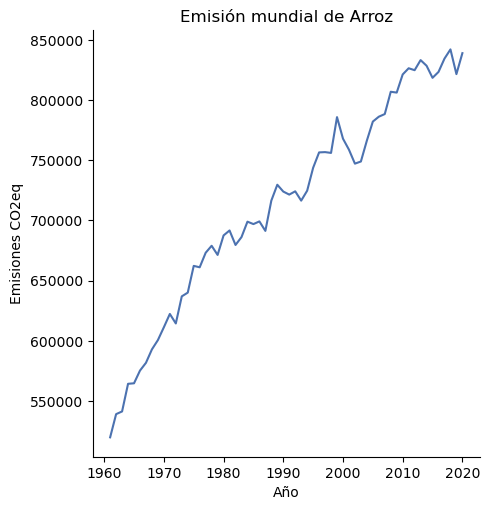

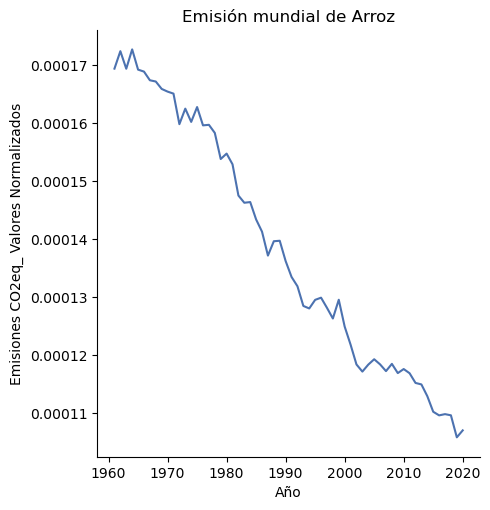

In [ ]:
sns.set_palette("deep")
sns.relplot(data = df_emision_arroz_mundo, x = 'Año', y= 'Valor', kind = 'line')
plt.xlabel('Año')
plt.ylabel('Emisiones CO2eq')
plt.title('Emisión mundial de Arroz')

sns.set_palette("deep")
sns.relplot(data = df_emision_arroz_mundo, x = 'Año', y= 'valor_normalizado', kind = 'line')
plt.xlabel('Año')
plt.ylabel('Emisiones CO2eq_ Valores Normalizados')
plt.title('Emisión mundial de Arroz')

plt.show()

In [ ]:
df_arroz_area = df_Cultivos_arroz.loc[df_Cultivos_arroz.elemento == 'Área cosechada']

#### Emisiones por Producción

In [ ]:
df_emision_arroz.shape

(9780, 11)

In [ ]:
df_produccion_arroz = df_emisiones.loc[(df_emisiones.Elemento == 'Producción')&
 (df_emisiones.Producto == 'Arroz')]

# Criar una variable de identificacion en cada DF
df_emision_arroz['id'] = range(1,9781)
df_produccion_arroz['id'] = range(1,9721)

# Merge de los dos df usando la variable id
df_arroz_emis_produccion = df_emision_arroz.merge(df_produccion_arroz, on = 'id')

# Eliminar variables que no vamos utilizar
#df_arroz_emis_produccion.drop( ['Código área_x', 'Código área (M49)_x', 'Código Producto_x', 'Código Producto (CPC)_x', 'Producto_x', 'Código Elemento_x', 
#                        'Unidad_x', 'Código área (M49)_y', 'Área_y', 'Código Producto_y', 'Código Producto (CPC)_y', 'Producto_y', 'Código Elemento_y',
  #                      'Unidad_y','Año_y'], axis= 1, inplace= True)

df_arroz_emis_produccion_mundo= df_arroz_emis_produccion.loc[df_arroz_emis_produccion.Área_x == 'Mundo']
df_arroz_emis_produccion_mundo= df_arroz_emis_produccion_mundo.dropna()
df_arroz_emis_produccion_cont= df_arroz_emis_produccion.loc[df_arroz_emis_produccion.Área_x.isin(continentes)]
df_arroz_emis_produccion_cont= df_arroz_emis_produccion_cont.dropna()



C:\Users\Rhuana Reis\AppData\Local\Temp\ipykernel_10896\2221315827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emision_arroz['id'] = range(1,9781)
C:\Users\Rhuana Reis\AppData\Local\Temp\ipykernel_10896\2221315827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_produccion_arroz['id'] = range(1,9721)


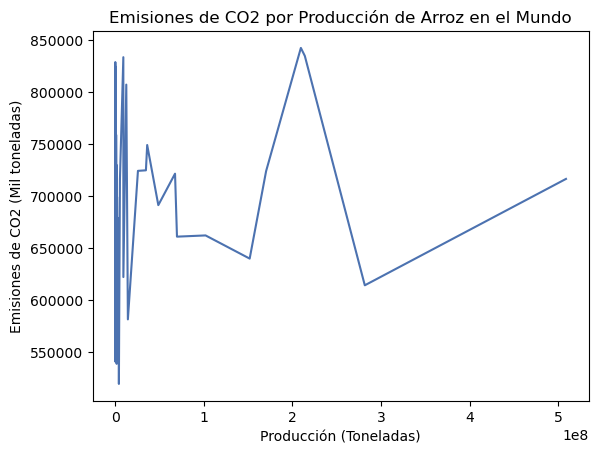

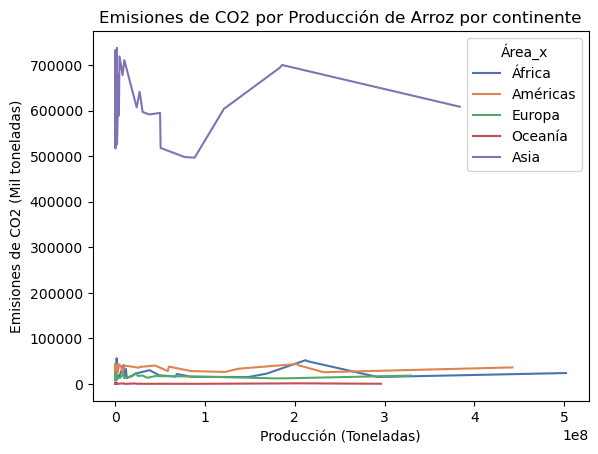

In [ ]:
#Grafico 1 
sns.lineplot(data = df_arroz_emis_produccion_mundo, x = 'Valor_y', y= 'Valor_x')
plt.ylabel('Emisiones de CO2 (Mil toneladas)')
plt.xlabel('Producción (Toneladas)')
plt.title('Emisiones de CO2 por Producción de Arroz en el Mundo')

plt.show()

# Grafico 2
sns.lineplot(data = df_arroz_emis_produccion_cont, x = 'Valor_y', y= 'Valor_x', hue= 'Área_x')
plt.ylabel('Emisiones de CO2 (Mil toneladas)')
plt.xlabel('Producción (Toneladas)')
plt.title('Emisiones de CO2 por Producción de Arroz por continente')

plt.show()

### Emisiones por Área Cosechada

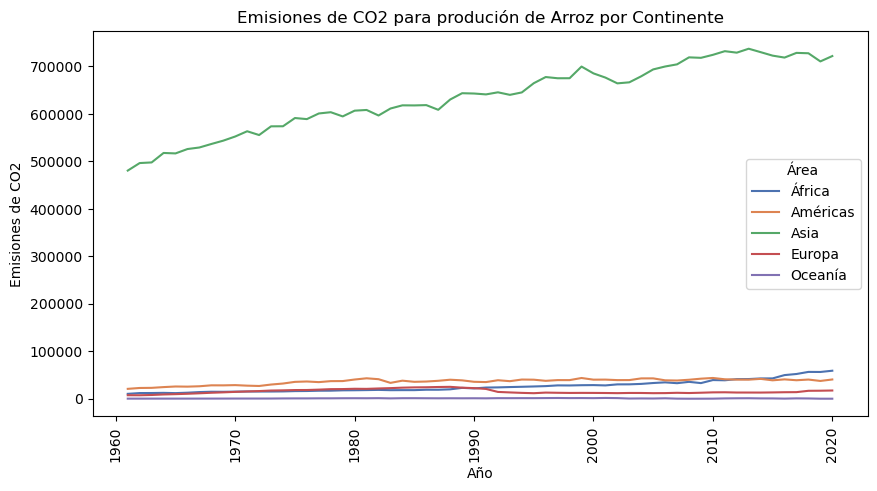

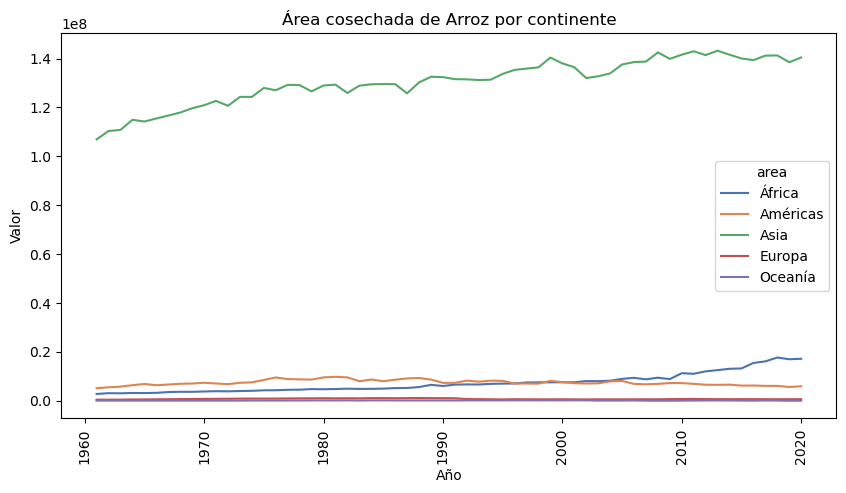

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df_emission_arroz_cont, x = 'Año', y= 'Valor', hue= 'Área')
plt.xlabel('Año')
plt.ylabel('Emisiones de CO2')
plt.title('Emisiones de CO2 para produción de Arroz por Continente')
plt.xticks(rotation = 90)

plt.figure(figsize=(10,5))
sns.lineplot(data = df_Cultivos_arroz_area, x = 'año', y= 'valor', hue= 'area')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.title('Área cosechada de Arroz por continente')
plt.xticks(rotation = 90)

plt.show()

In [ ]:
df_emission_arroz_cont['id'] = range(1,301)
df_Cultivos_arroz_area['id'] = range(1,301)
df_arroz_area_emis = df_emission_arroz_cont.merge(df_Cultivos_arroz_area, on = 'id')

C:\Users\Rhuana Reis\AppData\Local\Temp\ipykernel_10896\1615131210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emission_arroz_cont['id'] = range(1,301)
C:\Users\Rhuana Reis\AppData\Local\Temp\ipykernel_10896\1615131210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cultivos_arroz_area['id'] = range(1,301)


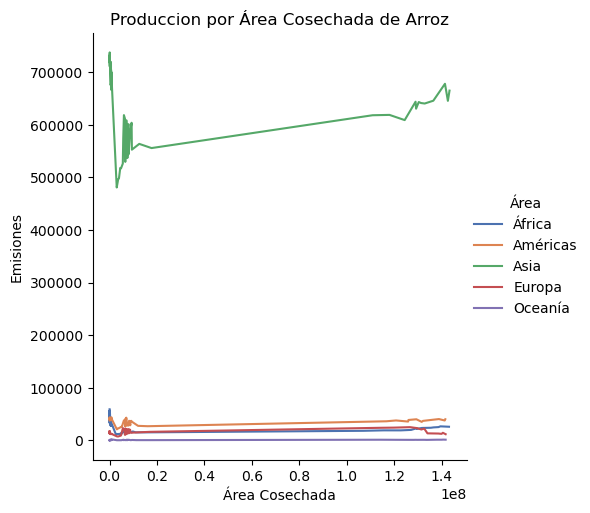

In [ ]:
sns.relplot(data = df_arroz_area_emis, y = 'Valor', x= 'valor', kind = 'line', hue = 'Área')
plt.xlabel('Área Cosechada')
plt.ylabel('Emisiones')
plt.title('Produccion por Área Cosechada de Arroz')
plt.show()

### Área Cosechada por Producción

C:\Users\Rhuana Reis\AppData\Local\Temp\ipykernel_10896\536875153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_area_arroz['id'] = range(1,1533)
C:\Users\Rhuana Reis\AppData\Local\Temp\ipykernel_10896\536875153.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod_arroz['id'] = range(1,1533)


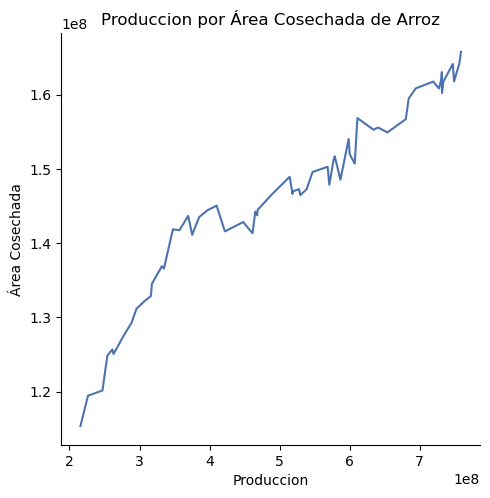

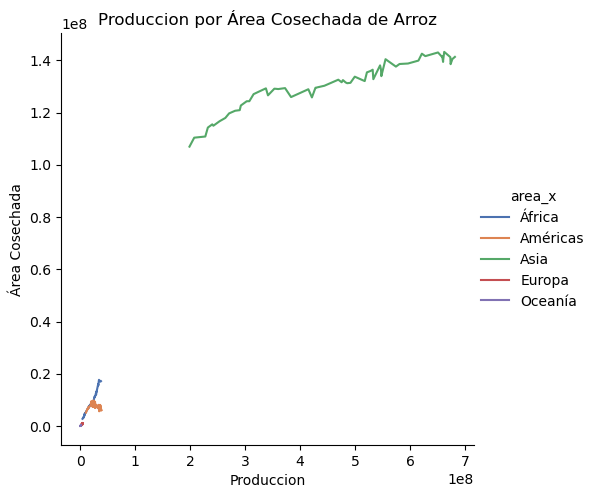

In [ ]:
df_prod_arroz= df_Cultivos_Poblacion.loc[(df_Cultivos_Poblacion.elemento == 'Producción')& (df_Cultivos_Poblacion.producto == 'Arroz, cascara')]
df_area_arroz= df_Cultivos_Poblacion.loc[(df_Cultivos_Poblacion.elemento == 'Área cosechada')& (df_Cultivos_Poblacion.producto == 'Arroz, cascara')]
df_area_arroz['id'] = range(1,1533)
df_prod_arroz['id'] = range(1,1533)

# Merge de los dos df usando la variable id
df_arroz_area_prod = df_area_arroz.merge(df_prod_arroz, on = 'id')
df_arroz_area_prod.drop(['Unnamed: 0.1_x', 'Unnamed: 0_x','codigo_producto_x','codigo_area_x', 'codigo_elemento_x', 'unidad_x','codigo_producto_y',
                         'Unnamed: 0.1_y', 'Unnamed: 0_y', 'codigo_area_y', 'codigo_elemento_y', 'simbolo_y',
                         'area_y', 'año_y', 'codigo_elemento_x' ], axis=1 , inplace = True)
df_arroz_area_prod_mundo= df_arroz_area_prod.loc[df_arroz_area_prod.area_x == 'Mundo']
df_arroz_area_prod_cont= df_arroz_area_prod.loc[df_arroz_area_prod.area_x.isin(continentes)]


sns.relplot(data = df_arroz_area_prod_mundo, x = 'valor_y', y= 'valor_x', kind = 'line')
plt.ylabel('Área Cosechada')
plt.xlabel('Produccion')
plt.title('Produccion por Área Cosechada de Arroz')


sns.relplot(data = df_arroz_area_prod_cont, x = 'valor_y', y= 'valor_x', kind = 'line', hue = 'area_x')
plt.ylabel('Área Cosechada')
plt.xlabel('Produccion')
plt.title('Produccion por Área Cosechada de Arroz')
plt.show()

+ El área de casecha esta directamente ligada a la produccion de Arroz, las dos presentan practicamente la misma relación con la emisión de CO2, que puede sugerir que hay que cambiar la forma de producir el arroz buscando maneras que no tengan tanta relación con el uso del suelo.

### Arroz y otros cereales 
<br>

Comparar las emisiones de Arroz con los demás cereales

In [ ]:
cereales = ['Cereales sin arroz','Arroz']
df_emisiones_cereales = df_emisiones.loc[(df_emisiones.Producto.isin(cereales))& (df_emisiones.Elemento == 'Emisiones (CO2eq) (AR5)')]
df_emisiones_cereales_mundo = df_emisiones_cereales.loc[df_emisiones_cereales.Área == 'Mundo']

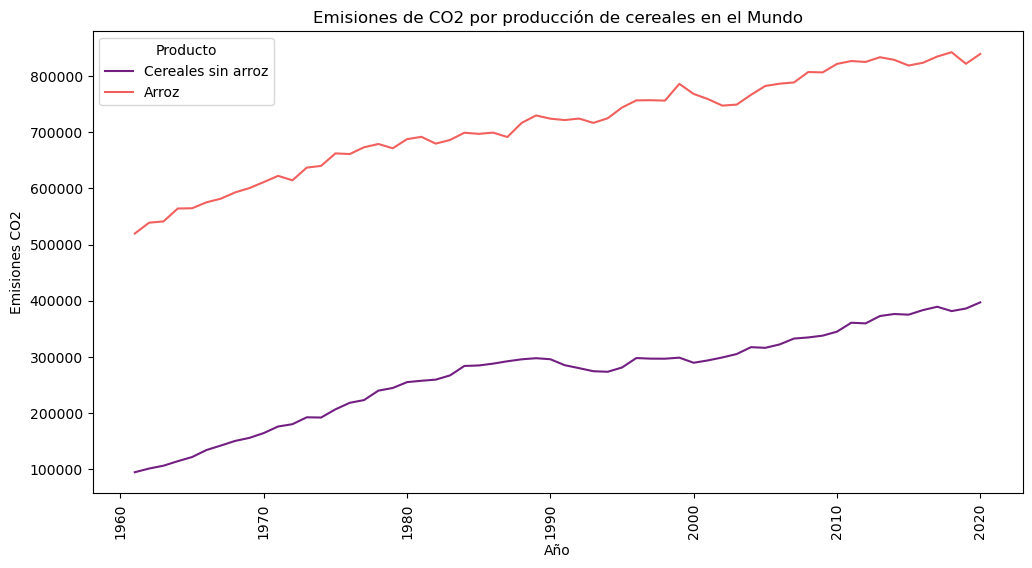

In [ ]:

plt.figure(figsize=(12,6))
sns.lineplot(data=df_emisiones_cereales_mundo, x='Año', y='Valor', hue='Producto', palette='magma')
plt.ylabel('Emisiones CO2')
plt.xlabel('Año')
plt.title('Emisiones de CO2 por producción de cereales en el Mundo')
plt.xticks(rotation=90)

plt.show()

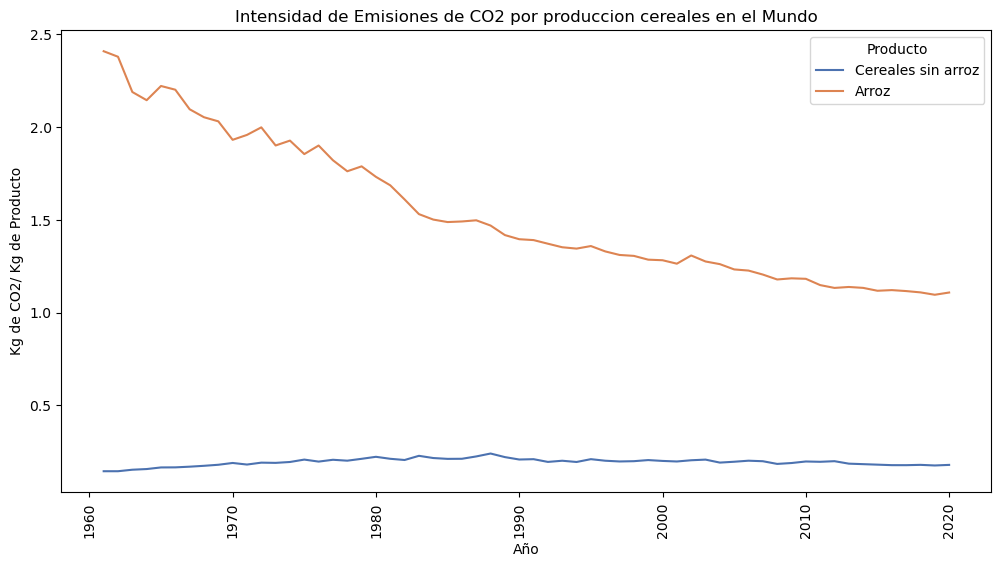

In [ ]:
df_intensidad_cereales = df_emisiones.loc[(df_emisiones.Producto.isin(cereales))& (df_emisiones.Elemento == 'Intensidad de emisiónes')]
df_intensidad_cereales_mundo = df_intensidad_cereales.loc[df_intensidad_cereales.Área == 'Mundo']

plt.figure(figsize=(12,6))
sns.lineplot(data = df_intensidad_cereales_mundo , x = 'Año', y= 'Valor', hue = 'Producto')
plt.ylabel('Kg de CO2/ Kg de Producto')
plt.xlabel('Año')
plt.title('Intensidad de Emisiones de CO2 por produccion cereales en el Mundo')
plt.xticks(rotation=90)
plt.show()


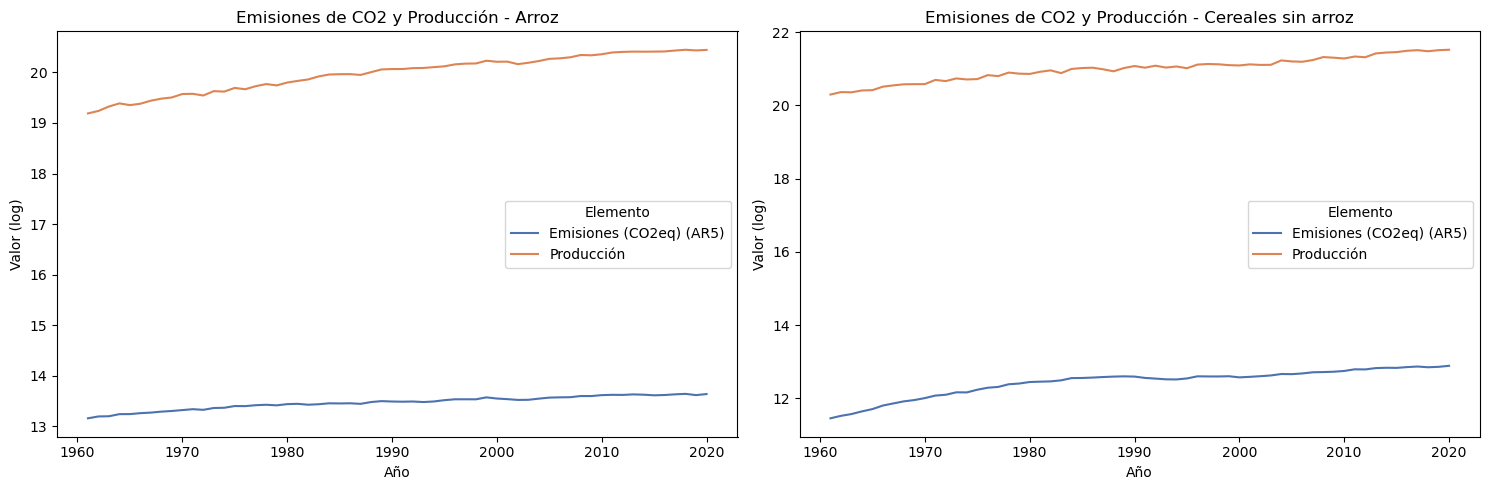

In [ ]:
elementos = ['Emisiones (CO2eq) (AR5)', 'Producción']

df_emisiones_mundo = df_emisiones.loc[df_emisiones.Área == 'Mundo']
df_emi_prod_arroz = df_emisiones_mundo.loc[(df_emisiones_mundo.Producto == 'Arroz') & (df_emisiones_mundo.Elemento.isin(elementos))]
df_emi_prod_cereales = df_emisiones_mundo.loc[(df_emisiones_mundo.Producto == 'Cereales sin arroz') & (df_emisiones_mundo.Elemento.isin(elementos))]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Gráfico 1 - Arroz
sns.lineplot(data=df_emi_prod_arroz, x='Año', y=np.log1p(df_emi_prod_arroz['Valor']), hue='Elemento', ax=axes[0])
axes[0].set_ylabel('Valor (log)')
axes[0].set_xlabel('Año')
axes[0].set_title('Emisiones de CO2 y Producción - Arroz')

# Gráfico 2 - Cereales sin arroz
sns.lineplot(data=df_emi_prod_cereales, x='Año', y=np.log1p(df_emi_prod_cereales['Valor']), hue='Elemento', ax=axes[1])
axes[1].set_ylabel('Valor (log)')
axes[1].set_xlabel('Año')
axes[1].set_title('Emisiones de CO2 y Producción - Cereales sin arroz')

plt.tight_layout()  # Ajustar el espacio entre los gráficos
plt.show()


Estos dos gráficos muestran la evolución de las emisiones y la producción a lo largo de los años, tanto para el arroz en grano como para otros cereales distintos del arroz. La producción de ambas categorías parece muy superior a las emisiones generadas

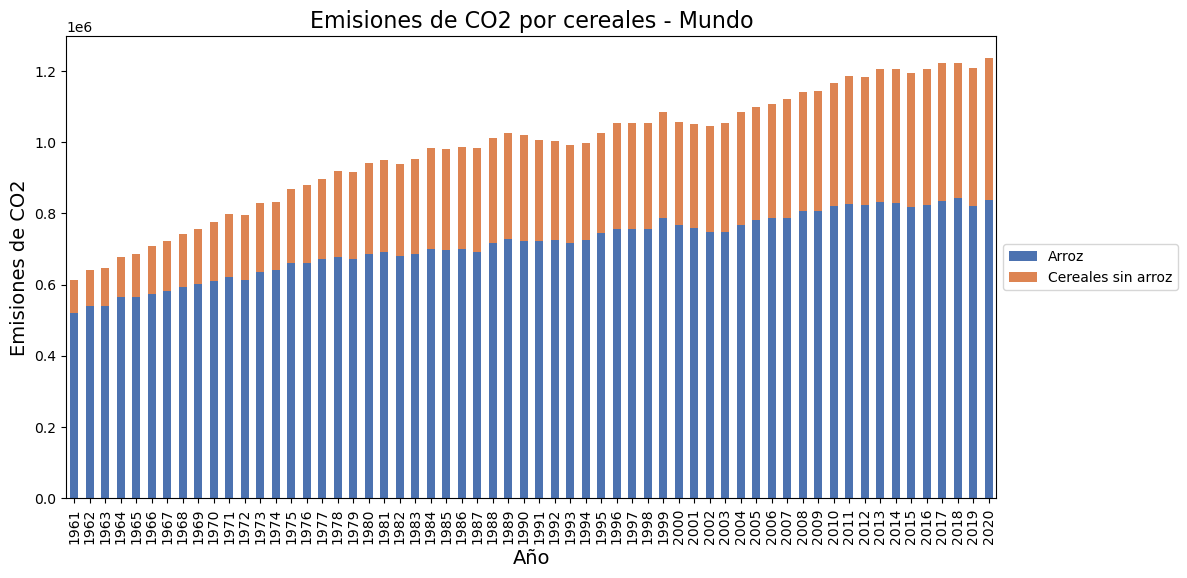

In [ ]:
#Creando pivot table
pivot_emisiones_cereales_mundo = df_emisiones_cereales_mundo.pivot(index='Año', columns='Producto', values='Valor')

# definir uma paleta de cores adequada
colors = sns.color_palette('deep', 4)

# criar o gráfico de barras empilhadas com a paleta de cores definida
ax = pivot_emisiones_cereales_mundo.plot(kind='bar', stacked=True, color=colors)

# adicionar legenda com fonte maior
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# adicionar rótulos dos eixos com fonte maior
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Emisiones de CO2', fontsize=14)

# adicionar título com fonte maior
ax.set_title('Emisiones de CO2 por cereales - Mundo', fontsize=16)

# ajustar o tamanho da figura
plt.gcf().set_size_inches(12, 6)

# mostrar o gráfico
plt.show()

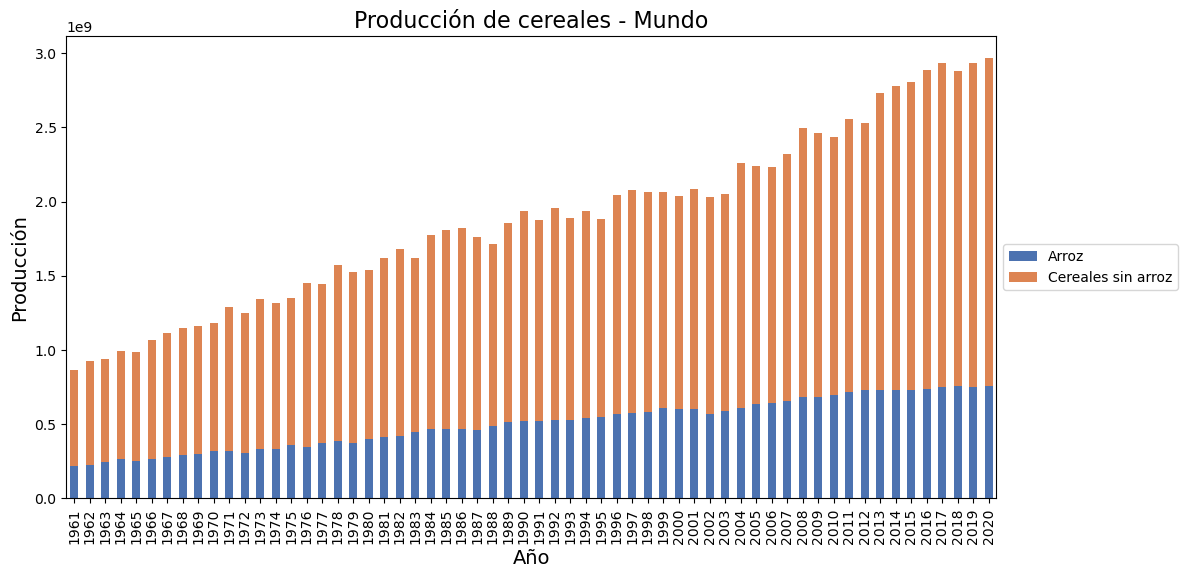

In [ ]:
df_produccion_cereales_mundo = df_emisiones.loc[(df_emisiones.Producto.isin(cereales))& (df_emisiones.Elemento == 'Producción')]
df_produccion_cereales_mundo = df_produccion_cereales_mundo.loc[df_produccion_cereales_mundo.Área == 'Mundo']

#Creando pivot table
pivot_produccion_cereales_mundo = df_produccion_cereales_mundo.pivot(index='Año', columns='Producto', values='Valor')

# definir uma paleta de cores adequada
colors = sns.color_palette('deep', 4)

# criar o gráfico de barras empilhadas com a paleta de cores definida
ax = pivot_produccion_cereales_mundo.plot(kind='bar', stacked=True, color=colors)

# adicionar legenda com fonte maior
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# adicionar rótulos dos eixos com fonte maior
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Producción', fontsize=14)

# adicionar título com fonte maior
ax.set_title('Producción de cereales - Mundo', fontsize=16)

# ajustar o tamanho da figura
plt.gcf().set_size_inches(12, 6)

# mostrar o gráfico
plt.show()


Con el análisis de cada factor de producción y emisión vemos que a pesar de tener una producción mucho mayor, los cereales sin arroz generan menos emisiones de CO2 eq

<h2><b>Modelo</h2></b>

## Arroz
<br>

El objetivo de este modelo es evaluar el impacto generado por la reducción de la producción de arroz con las emisiones de CO2 generadas por el cultivo de este cereal, que como hemos visto es un de los pricipales responsables por emisiones de CO2 en la agricultura. <br>

Utilizaremos como variable exógena la producción y el análisis se hará a nivel mundial

In [ ]:
df_intensidad_emisiones_mundo.drop(columns= ['Código área','Código área (M49)','Área', 'Código Producto','Código Producto (CPC)', 'Código Elemento'], inplace = True)
#DF con los dados de Arroz en el Mundo
df_arroz_mundo = df_intensidad_emisiones_mundo.loc[df_intensidad_emisiones_mundo.Producto == 'Arroz']


<ipython-input-33-32a8d8617f32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_intensidad_emisiones_mundo.drop(columns= ['Código área','Código área (M49)','Área', 'Código Producto','Código Producto (CPC)', 'Código Elemento'], inplace = True)


In [ ]:
# Separando cada elemento en un data set
df_arroz_mundo_intensidad = df_arroz_mundo.loc[df_arroz_mundo.Elemento == 'Intensidad de emisiónes']
df_arroz_mundo_Produccion = df_arroz_mundo.loc[df_arroz_mundo.Elemento == 'Producción']
df_arroz_mundo_Emision = df_arroz_mundo.loc[df_arroz_mundo.Elemento == 'Emisiones (CO2eq) (AR5)']

# Eliminado columnas inecesarias y renomeando.
df_arroz_mundo_intensidad.drop(columns= ['Elemento', 'Unidad', 'Producto'], inplace = True )
df_arroz_mundo_intensidad.rename(columns={'Valor' : 'intensidad', 'Año' : 'año'}, inplace = True)
df_arroz_mundo_intensidad.reset_index(drop= True, inplace = True)
df_arroz_mundo_Produccion.drop(columns= ['Elemento', 'Unidad', 'Producto'], inplace = True )
df_arroz_mundo_Produccion.rename(columns={'Valor' : 'producción', 'Año' : 'año'}, inplace = True)
df_arroz_mundo_Produccion.reset_index(drop= True, inplace = True)
df_arroz_mundo_Emision.drop(columns= ['Elemento', 'Unidad', 'Producto'], inplace = True )
df_arroz_mundo_Emision.rename(columns={'Valor' : 'emisiones_CO2eq' , 'Año' : 'año'}, inplace = True)
df_arroz_mundo_Emision.reset_index(drop= True, inplace = True)


# Merge de los 3 df con informaciones de intensidad de emisiones, emisiones y producción de otros cereales diferentes del arroz
df_arroz_mundo = df_arroz_mundo_Emision.copy()
df_arroz_mundo['producción'] = df_arroz_mundo_Produccion['producción']
df_arroz_mundo['intensidad'] = df_arroz_mundo_intensidad['intensidad']



<ipython-input-34-4ad7e85a0df5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arroz_mundo_intensidad.drop(columns= ['Elemento', 'Unidad', 'Producto'], inplace = True )
<ipython-input-34-4ad7e85a0df5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arroz_mundo_intensidad.rename(columns={'Valor' : 'intensidad', 'Año' : 'año'}, inplace = True)
<ipython-input-34-4ad7e85a0df5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a

<p> Como el objetivo es evaluar el impacto de la producción en las emisiones de CO2, dividiremos los datos de 1961-2010, para entrenar el modelo, y de 2011 a 2020 para generar previsiones con producción reducida. Y por último, comparar las emisiones con la producción reducida con la producción real para el mismo periodo. </p>

In [ ]:
#Preparando lo datos para el Prophet
df_m_arroz_mundo = df_arroz_mundo.copy()
df_m_arroz_mundo = df_m_arroz_mundo.loc[df_m_arroz_mundo.año<=2000]
df_av_arroz_mundo = df_arroz_mundo.loc[df_arroz_mundo.año>2000]
df_m_arroz_mundo['año']= pd.to_datetime(df_m_arroz_mundo['año'], format='%Y')
df_m_arroz_mundo = df_m_arroz_mundo.rename(columns={'año':'ds', 'emisiones_CO2eq':'y'})
df_m_arroz_mundo.tail(2)

,ds,y,producción,intensidad
38,1999-01-01,785945.7976,611177562.0,1.2860
39,2000-01-01,768020.9556,598668144.0,1.2829


### Valores de la producción

<p> Crear una columna con los valores de producción reducidos en 20%

In [ ]:
df_av_arroz_mundo['producción_red'] = df_av_arroz_mundo['producción'] * 0.80
df_arroz_prod_red= df_av_arroz_mundo.copy()
df_arroz_prod_red['año']= pd.to_datetime(df_arroz_prod_red['año'], format='%Y')

<ipython-input-36-9d1068ca5680>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_av_arroz_mundo['producción_red'] = df_av_arroz_mundo['producción'] * 0.80


<p> Crear uma columna con los valores reales hasta 2000 y con los valores reducidos de 2001 hasta 2020

In [ ]:
df_arroz_mundo_prod_red = df_arroz_mundo.copy()
df_arroz_mundo_prod_red['producción_red'] = df_arroz_prod_red['producción_red']
df_arroz_mundo_prod_red['producción_red'].fillna(df_arroz_mundo_prod_red['producción'], inplace=True)

### Modelo con los valores de producción disminuidos en 20%

In [ ]:
m_arroz_mundo = Prophet()
m_arroz_mundo.add_regressor('producción')
m_arroz_mundo.fit(df_m_arroz_mundo)

# Hacer la predicción a futuro y el cross validation sobre el modelo
fut_2_m_arroz_mundo = m_arroz_mundo.make_future_dataframe(periods=20, freq='YS')
fut_2_m_arroz_mundo['producción'] = df_arroz_mundo_prod_red['producción_red']
forecast_2_arroz_mundo = m_arroz_mundo.predict(fut_2_m_arroz_mundo)
df_cv_arroz_mundo_2= cross_validation(m_arroz_mundo, horizon='365 days')
df_p_arroz_mundo_2 = performance_metrics(df_cv_arroz_mundo_2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wu3nqvg/q_t1qyqe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wu3nqvg/zlzbkhf0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4219', 'data', 'file=/tmp/tmp8wu3nqvg/q_t1qyqe.json', 'init=/tmp/tmp8wu3nqvg/zlzbkhf0.json', 'output', 'file=/tmp/tmp8wu3nqvg/prophet_modelfkuakbwr/prophet_model-20230521161120.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:11:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:11:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 71 forecasts with cu

  0%|          | 0/71 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wu3nqvg/qitds4td.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wu3nqvg/zsgycvkq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9208', 'data', 'file=/tmp/tmp8wu3nqvg/qitds4td.json', 'init=/tmp/tmp8wu3nqvg/zsgycvkq.json', 'output', 'file=/tmp/tmp8wu3nqvg/prophet_model_azqueik/prophet_model-20230521161120.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:11:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:11:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wu3nqvg/k5sid0ah.json
DEBUG:cmdstanpy:input tempfile:

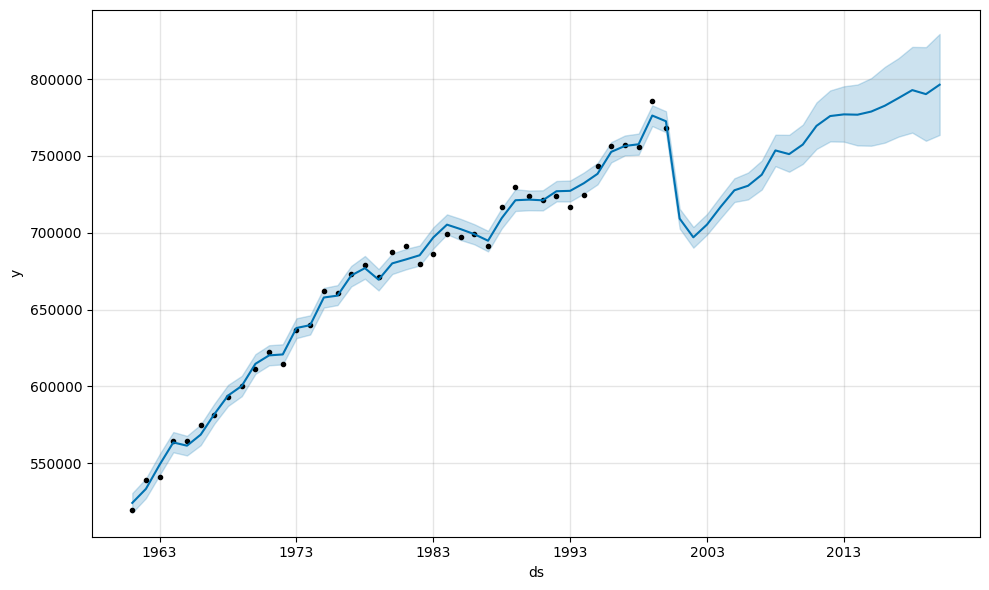

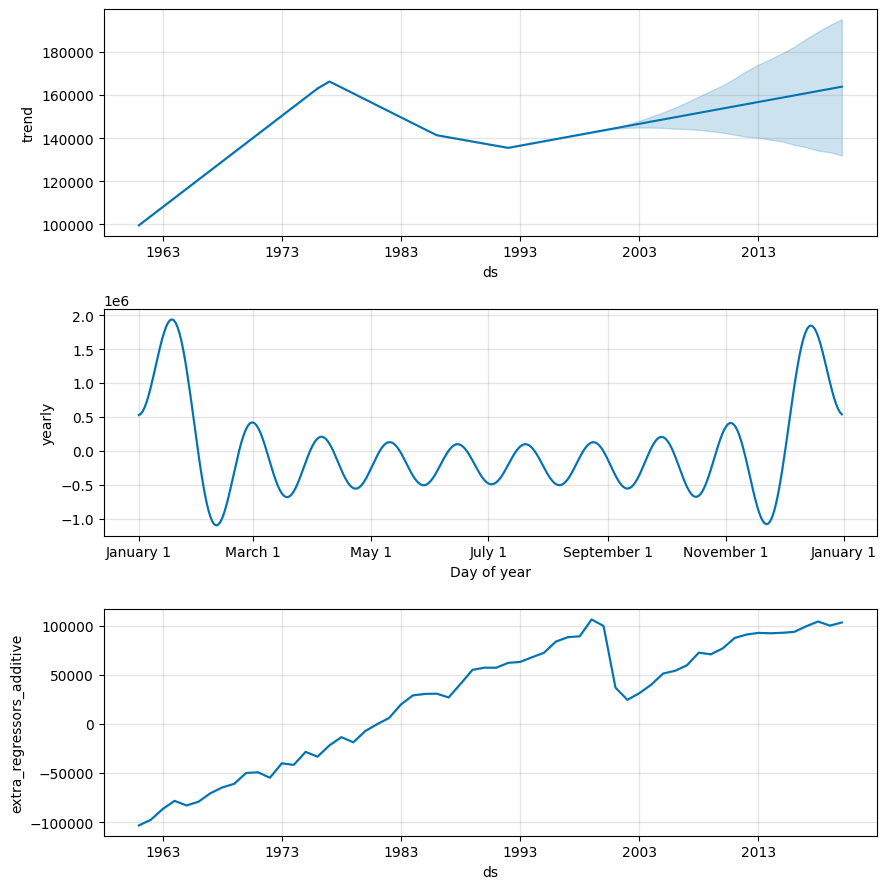

In [ ]:
fig = m_arroz_mundo.plot(forecast_2_arroz_mundo)
fig2 = m_arroz_mundo.plot_components(forecast_2_arroz_mundo)

### Análisis del impacto de la redución de producción 

In [ ]:
#Crear df con las prediciones
df_pred_arroz_red= forecast_2_arroz_mundo.copy()
col_mantener = ['ds', 'yhat']
col_drop = df_pred_arroz_red.columns.difference(col_mantener)
df_pred_arroz_red.drop(col_drop, axis=1, inplace = True)
df_pred_arroz_red.rename(columns={'yhat': 'predicion_prod_red'}, inplace = True)

#Transformar año en datetime para hacer el merge entre los dos df

df_arroz_mundo_prod_red['año']= pd.to_datetime(df_arroz_mundo_prod_red['año'], format='%Y')
df_arroz_mundo_prod_red = df_arroz_mundo_prod_red.rename(columns={'año':'ds'})

#Merge
df_emision_fut_arroz= df_arroz_mundo_prod_red.merge(df_pred_arroz_red, on = 'ds')
df_emision_fut_arroz_melt = pd.melt(df_emision_fut_arroz, id_vars=['ds'], value_vars=['emisiones_CO2eq', 'predicion_prod_red'],
                    var_name='categoria', value_name='valor')
df_emision_fut_arroz.head(2)

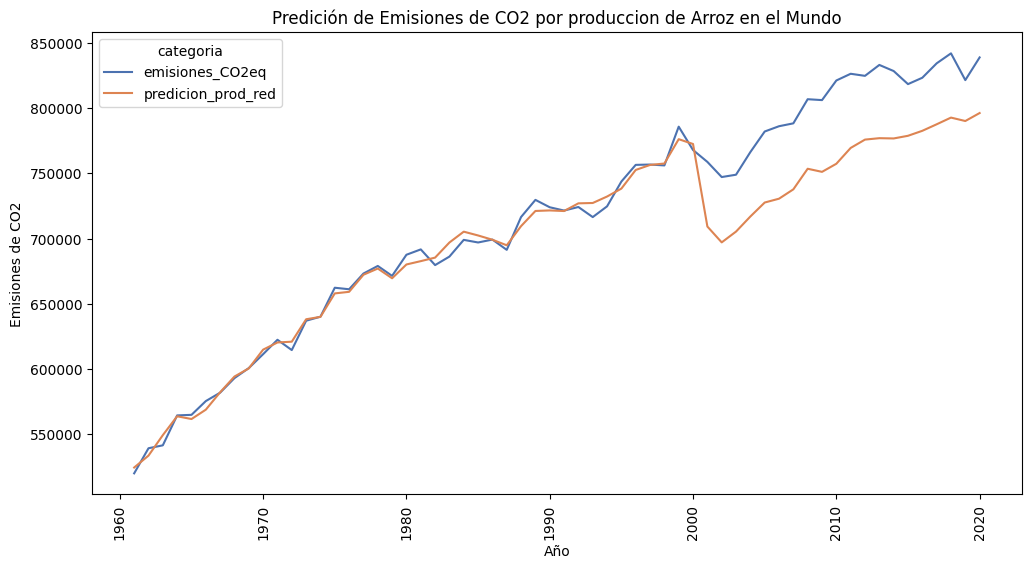

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data = df_emision_fut_arroz_melt , x = 'ds', y= 'valor', hue = 'categoria')
plt.ylabel('Emisiones de CO2')
plt.xlabel('Año')
plt.title('Predición de Emisiones de CO2 por produccion de Arroz en el Mundo')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_emision_fut_arroz['%_emisiones'] =100 - df_emision_fut_arroz['predicion_prod_red']*100/df_emision_fut_arroz['emisiones_CO2eq']
df_emision_fut_arroz.head(2)

,ds,emisiones_CO2eq,producción,intensidad,producción_red,año,predicion_prod_red,%_emisiones
0,1961-01-01,519626.3220,215646627.0,2.4096,215646627.0,1961-01-01,524104.153812,-0.861741
1,1962-01-01,538910.6461,226456291.0,2.3798,226456291.0,1962-01-01,533242.968240,1.051692


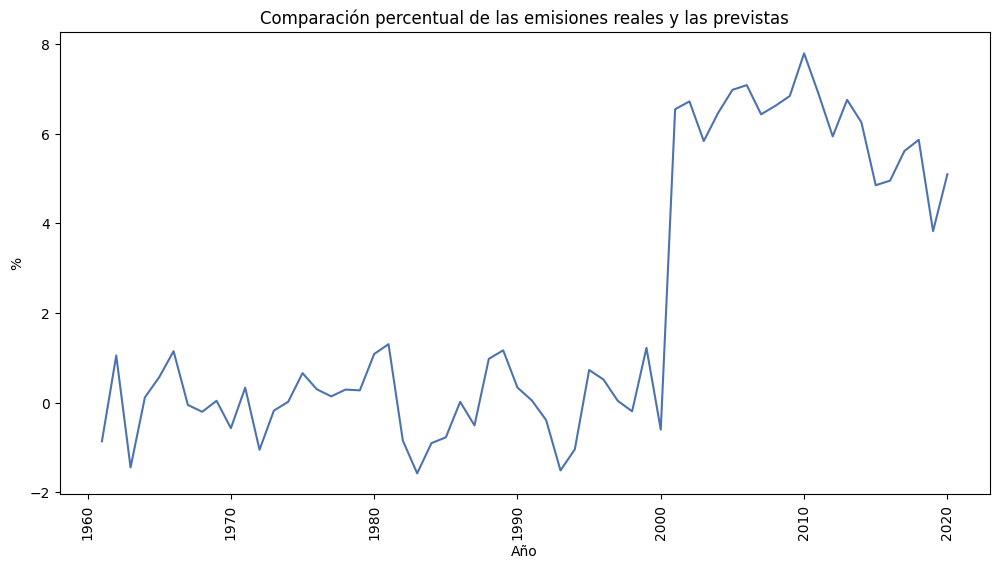

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data = df_emision_fut_arroz , x = 'ds', y= '%_emisiones')
plt.ylabel('%')
plt.xlabel('Año')
plt.title('Comparación percentual de las emisiones reales y las previstas')
plt.xticks(rotation=90)
plt.show()

In [ ]:
diferencia = df_emision_fut_arroz['emisiones_CO2eq'] - df_emision_fut_arroz['predicion_prod_red']
print(diferencia.sum())

991287.8405005962


<p>Como muestra el gráfico, con una reducción del 20% de la producción de arroz, la reducción de las emisiones de CO2 varía del 4 al 8%. Lo que representaria aproximadamente 991.000 mil toneladas de CO2 que dejarian de ser emitidos en los ultimos 20 años</p>

<h2><b>Análisis del Ganado </b></h2>

In [ ]:
#Estos son los valores que nos interesan del dataset
dfcol = ['Área','Producto', 'Elemento','Año', 'Unidad','Valor']

In [ ]:
df_ganado = pd.read_csv('Data/MedioAmbiente_TendenciasGanaderia_S_Todos_los_Datos_(Normalizado).csv', usecols=dfcol, encoding= 'ISO-8859-1')

<p> Hacemos un análisis general a nivel mundial de los rebaños </p>

In [ ]:
df_ganado_mundo = df_ganado[df_ganado['Área'] == 'Mundo']

<p>Seleccionamos que tipo de ganado vamos a analizar</p>

In [ ]:
tipo_ganado = ['Ganado vacuno', 'Porcinos / cerdos', 'Ovejas y cabras','Equidae','Camellos']

In [ ]:
df_ganado_seleccionado_mundo = df_ganado_mundo[df_ganado_mundo['Producto'].isin(tipo_ganado)]

C:\Users\leo_r\AppData\Local\Temp\ipykernel_20996\1176270616.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_ganado_seleccionado_mundo[df_ganado_mundo['Unidad'] == '% del total de UGM']


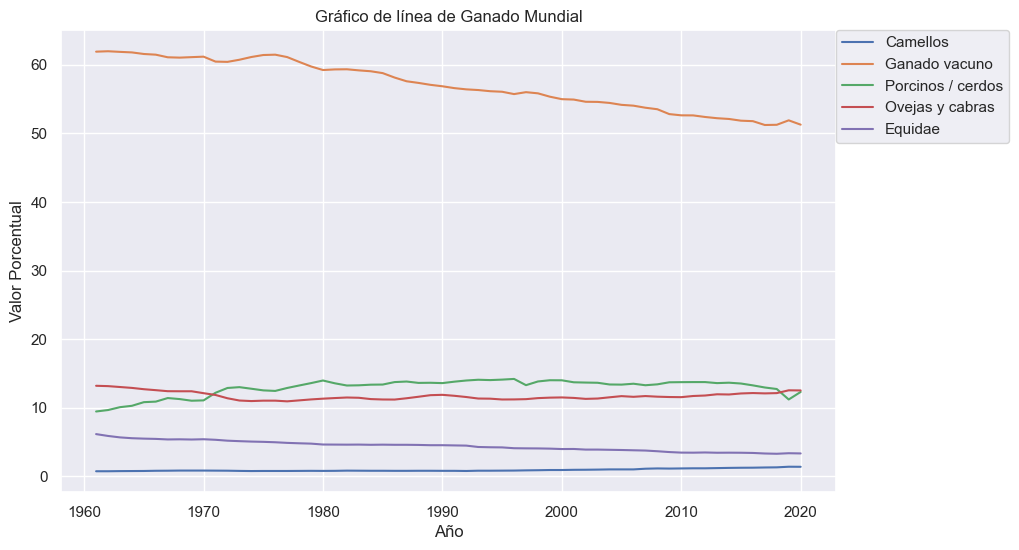

In [ ]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)

# Filtrar el DataFrame por el campo 'Unidad'
df_filtered = df_ganado_seleccionado_mundo[df_ganado_mundo['Unidad'] == '% del total de UGM']

sns.lineplot(data=df_filtered, x='Año', y='Valor', hue='Producto')

plt.title('Gráfico de línea de Ganado Mundial')
plt.xlabel('Año')
plt.ylabel('Valor Porcentual')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)  # Colocar la leyenda fuera del gráfico (opcional)

plt.show()

<p> En la gráfica podemos ver que los rebaños de ganado vacuno son los que predominan desde hace más de 60 años, sin embargo, vemos que ha disminuido a lo largo del tiempo. Vamos entonces a ver en niveles porcentuales cómo ha sido la variación de la composición de los rebaños</p>

In [ ]:
año_minimo = df_ganado_seleccionado_mundo['Año'].min()
año_maximo = df_ganado_seleccionado_mundo['Año'].max()

df_año_minimo = df_ganado_seleccionado_mundo[df_ganado_seleccionado_mundo['Año'] == año_minimo]
df_año_maximo = df_ganado_seleccionado_mundo[df_ganado_seleccionado_mundo['Año'] == año_maximo]

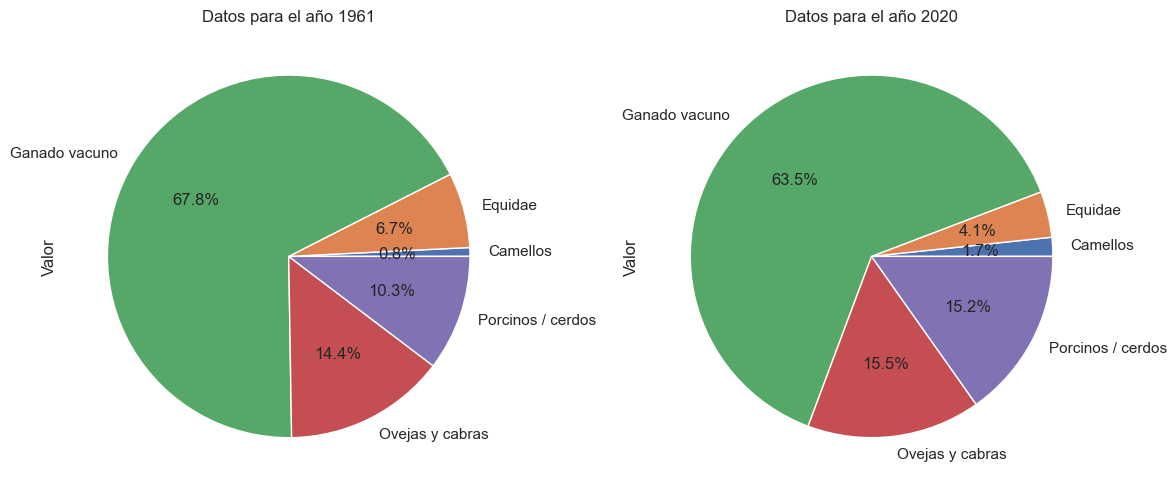

In [ ]:
plt.figure(figsize=(12, 6))  # Tamaño del gráfico (opcional)

# Gráfico para el año mínimo
plt.subplot(1, 2, 1)
plt.title(f'Datos para el año {año_minimo}')
df_año_minimo.groupby('Producto')['Valor'].sum().plot(kind='pie', autopct='%1.1f%%')

# Gráfico para el año máximo
plt.subplot(1, 2, 2)
plt.title(f'Datos para el año {año_maximo}')
df_año_maximo.groupby('Producto')['Valor'].sum().plot(kind='pie', autopct='%1.1f%%')

plt.tight_layout()  # Ajusta el espaciado entre los subplots

plt.show()

<p>De estos datos podemos decir que en general en el perio 1960-2020 </p>
<ul><li>El ganado vacuno representa en el 2020 4,3% menos que lo que representaba en 1960</li>
    <li>El ganado porcino en ese mismo periodo ha aumentado un 4,9%</li>
    <li>Los rebaños equinos también han disminuido hasta representar un 2,6% menos</li>
    <li>Lo rebaños de ovejas y cabras han tenido un crecimiento equivalente al 1,1%</li>
    <li>La población de camellos ha ido del 0,8% hasta el 1,7%, en general ha duplicado su existencia</li></ul>
<p>En el siguiente gráfico vamos a ver esta variación en los rebaños</p>

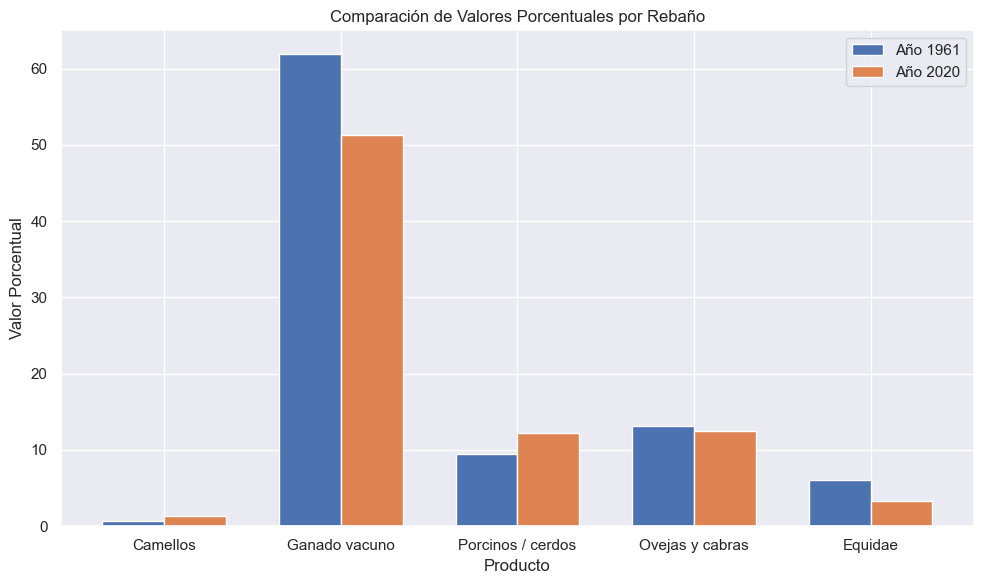

In [ ]:
# Filtrar el DataFrame por el campo 'Unidad'
df_filtered = df_ganado_seleccionado_mundo[df_ganado_seleccionado_mundo['Unidad'] == '% del total de UGM']

# Obtener el año más bajo y el año más alto
min_year = df_filtered['Año'].min()
max_year = df_filtered['Año'].max()

# Filtrar los datos para el año más bajo
df_min_year = df_filtered[df_filtered['Año'] == min_year]

# Filtrar los datos para el año más alto
df_max_year = df_filtered[df_filtered['Año'] == max_year]

# Calcular los valores porcentuales para cada producto en el año más bajo
values_min_year = df_min_year['Valor'].values
labels_min_year = df_min_year['Producto'].values

# Calcular los valores porcentuales para cada producto en el año más alto
values_max_year = df_max_year['Valor'].values
labels_max_year = df_max_year['Producto'].values

# Configurar los índices de las barras para cada año
ind = np.arange(len(labels_min_year))

# Configurar el ancho de las barras
width = 0.35

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
plt.bar(ind, values_min_year, width, label=f'Año {min_year}')
plt.bar(ind + width, values_max_year, width, label=f'Año {max_year}')

plt.title('Comparación de Valores Porcentuales por Rebaño')
plt.xlabel('Producto')
plt.ylabel('Valor Porcentual')
plt.xticks(ind + width/2, labels_min_year)
plt.legend()
plt.tight_layout()
plt.show()

<h2><b>Emisiones</h2></b>

<h3><b>Fermentación Entérica</b></h3>

<p>En este punto del trabajo vamos a analisar primeramente las emisiones derivadas de la fermentación entérica del ganado. La fermentación entérica es un proceso que se da principalmente en los rumiantes, donde por el tipo de digestión de estos, se genera gran cantidad de metano ya sea por vías de eructos o flatulencias</p>
<p>En este apartado, vamos a ver las existencias por cabeza de ganado y las emisiones en toneladas</p>

In [ ]:
df_emisiones = pd.read_csv('Data\Emisiones_Agricultura_Fermentación_entérica_S_Todos_los_Datos_(Normalizado).csv', usecols=dfcol, encoding='ISO-8859-1')

In [ ]:
# Vamos a tomar el análisis de todo el mundo
df_emisiones_mundo = df_emisiones[df_emisiones['Área'] == 'Mundo']

In [ ]:
# Vamos a separar el dataframe en dos dataframes, para tener por un lado las existencias y por otro las emisiones
df_existencia_mundo = df_emisiones_mundo[df_emisiones_mundo['Elemento'] == 'Existencias']
df_emisiones_mundo = df_emisiones_mundo[df_emisiones_mundo['Elemento'] != 'Existencias']

In [ ]:
df_emisiones_mundo.head(3)

,Área,Producto,Elemento,Año,Unidad,Valor
300336,Mundo,Asnos,Emisiones (CH4),1961,mil toneladas,369.5279
300337,Mundo,Asnos,Emisiones (CH4),1962,mil toneladas,355.9395
300338,Mundo,Asnos,Emisiones (CH4),1963,mil toneladas,353.6587


<p>Para hacer las comparaciones entre cabezas de ganado y las emisiones de CH4 vamos primero a pasar las unidades de miles de toneladas a toneladas y luego vamos a usar una transformación logarítmica para tener ambos valores en escalas similares y que la comparación pueda ser visualmente más entendible</p>

In [ ]:
df_emisiones_mundo.loc[:, 'Valor'] = df_emisiones_mundo.loc[:, 'Valor'] * 1000

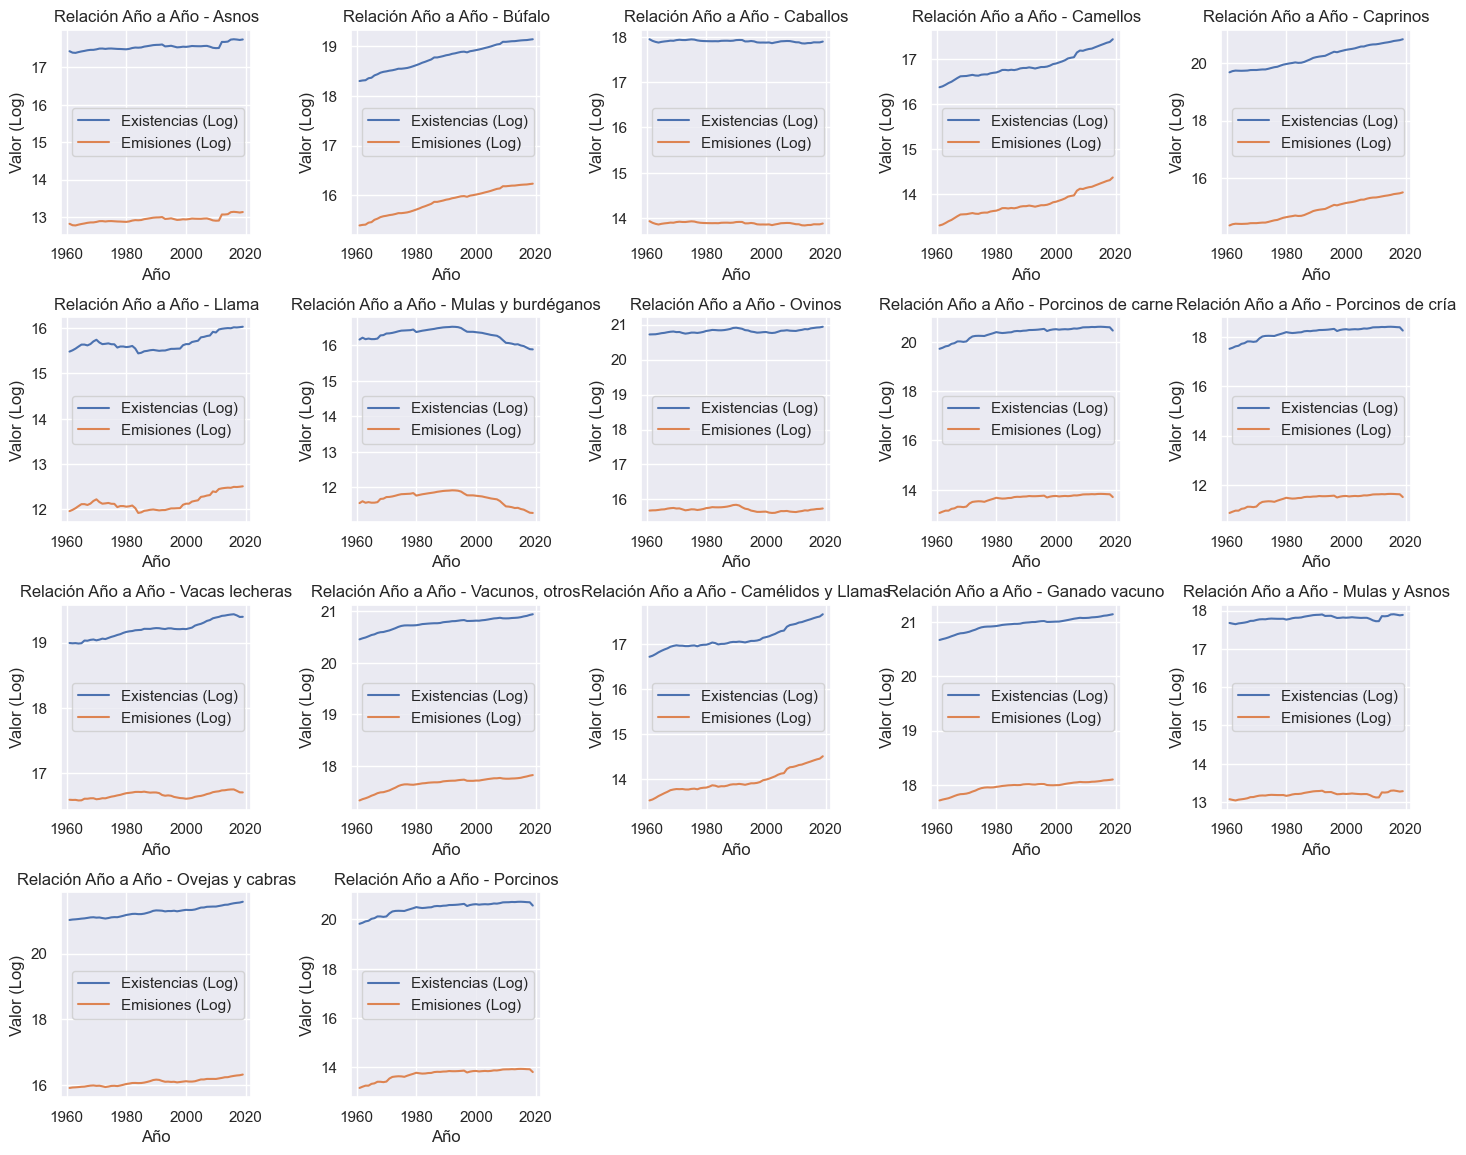

In [ ]:
# Combina los DataFrames por 'Producto' y 'Año'
df_combined = pd.merge(df_emisiones_mundo, df_existencia_mundo, on=['Producto', 'Año'], suffixes=('_emisiones', '_existencias'))

# Filtra los años para que no sean mayores a 2020
df_combined = df_combined[df_combined['Año'] <= 2020]

# Obtén los productos únicos
productos_unicos = df_combined['Producto'].unique()

# Calcula el número de filas y columnas para el mosaico
num_filas = 4
num_columnas = 5
num_graficos = min(len(productos_unicos), num_filas * num_columnas)

# Crea el mosaico de subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 12))
fig.tight_layout(pad=3.0)

# Itera sobre los productos únicos y crea los gráficos en el mosaico
for i, producto in enumerate(productos_unicos[:num_graficos]):
    # Filtra los datos para el producto actual
    df_producto = df_combined[df_combined['Producto'] == producto]
    
    # Extrae las columnas de interés
    años = df_producto['Año']
    emisiones = df_producto['Valor_emisiones']
    existencias = df_producto['Valor_existencias']
    
    # Aplica la transformación logarítmica a los valores
    emisiones_log = np.log1p(emisiones)
    existencias_log = np.log1p(existencias)
    
    # Calcula las coordenadas del subplot actual
    fila = i // num_columnas
    columna = i % num_columnas
    
    # Grafica la relación año a año entre existencias y emisiones (en escala logarítmica) para el producto actual
    axs[fila, columna].plot(años, existencias_log, label='Existencias (Log)')
    axs[fila, columna].plot(años, emisiones_log, label='Emisiones (Log)')
    axs[fila, columna].set_title(f'Relación Año a Año - {producto}')
    axs[fila, columna].set_xlabel('Año')
    axs[fila, columna].set_ylabel('Valor (Log)')
    axs[fila, columna].legend()

# Oculta los subplots vacíos si hay menos de num_filas x num_columnas gráficos
for i in range(num_graficos, num_filas * num_columnas):
    fila = i // num_columnas
    columna = i % num_columnas
    axs[fila, columna].axis('off')

plt.show()

<p>En los gráficos anteriores estamos analizando las emisiones de CH4 por cabeza de ganado. Sin embargo, en los análisis se tiende a llevar todo a nivel de CO2. Es decir, debemos saber a cuanto equivale una tonelada de emisiones de CH4 en emisiones de CO2. Esto se llama CO2eq o CO2 equivalente. Para el caso del CH4, una tonelada de este calienta la tierra 28 veces más que una tonelada de CO2, es decir, que el CO2eq del CH4 es multiplicar las emisiones de CH4 por 28. Vamos a hacer ese ejercicio y volver a hacer los gráficos para entender las emisiones del ganado en CO2eq</p>

In [ ]:
df_emisiones_mundo.loc[:, 'Valor'] = df_emisiones_mundo.loc[:, 'Valor'] * 28

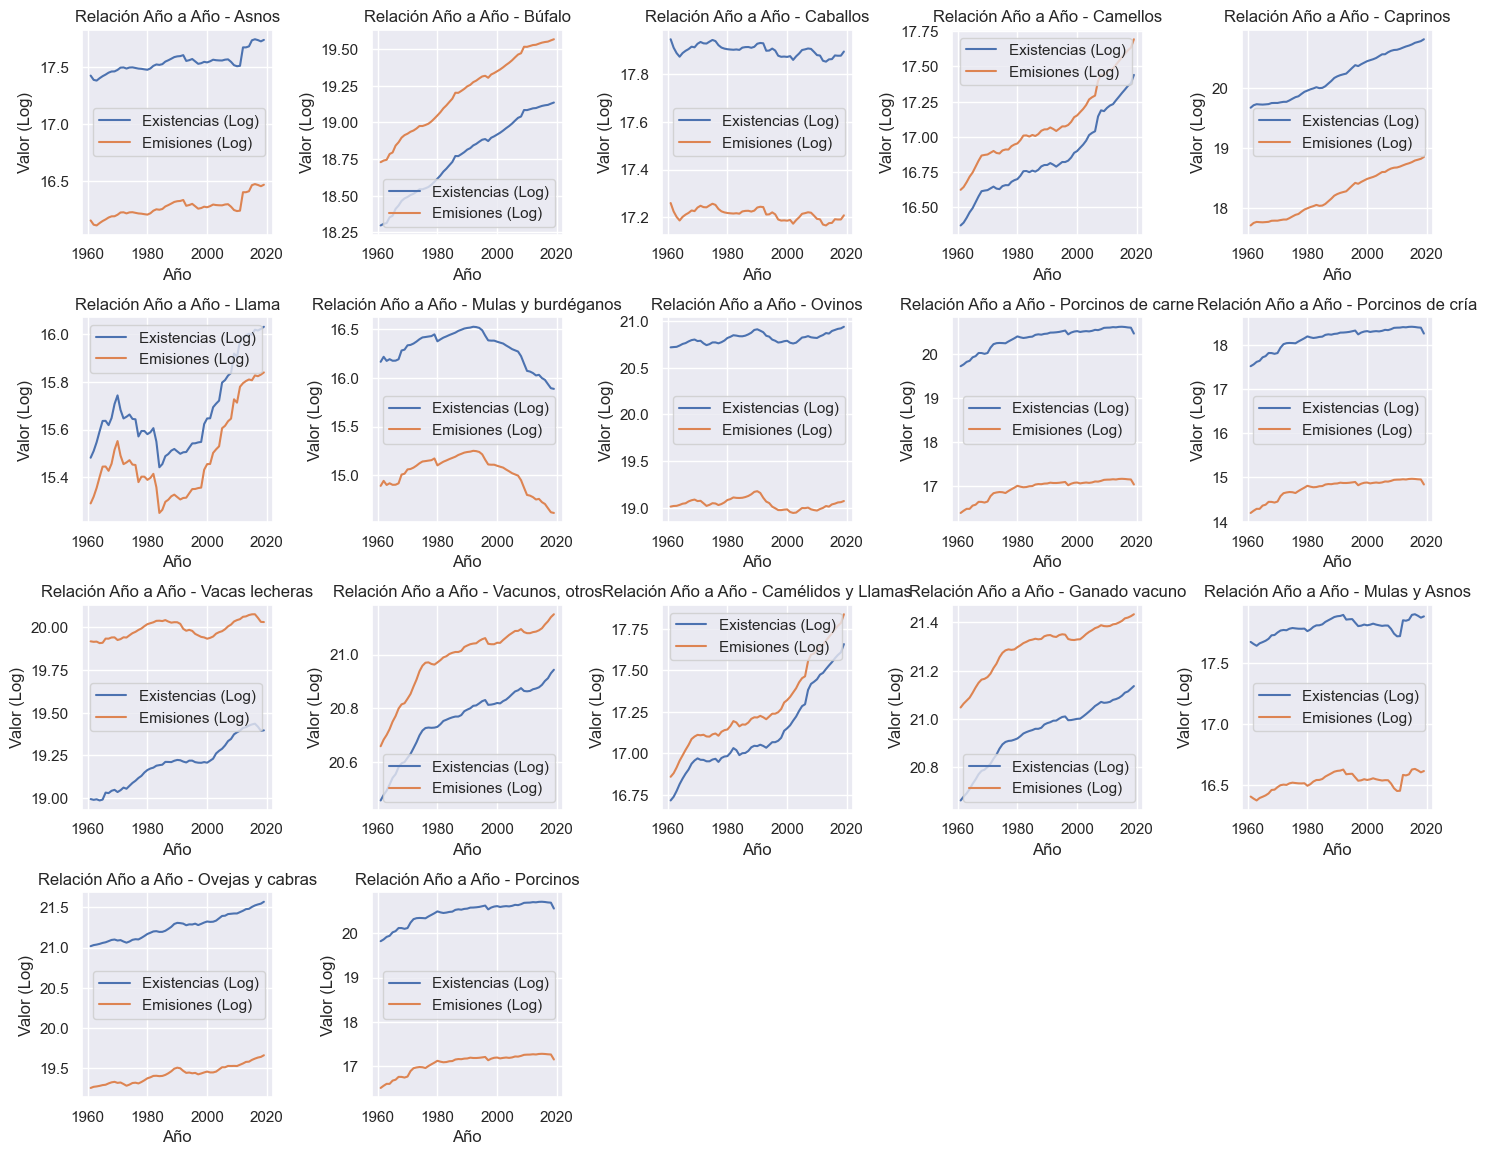

In [ ]:
# Combina los DataFrames por 'Producto' y 'Año'
df_combined = pd.merge(df_emisiones_mundo, df_existencia_mundo, on=['Producto', 'Año'], suffixes=('_emisiones', '_existencias'))

# Filtra los años para que no sean mayores a 2020
df_combined = df_combined[df_combined['Año'] <= 2020]

# Obtén los productos únicos
productos_unicos = df_combined['Producto'].unique()

# Calcula el número de filas y columnas para el mosaico
num_filas = 4
num_columnas = 5
num_graficos = min(len(productos_unicos), num_filas * num_columnas)

# Crea el mosaico de subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 12))
fig.tight_layout(pad=3.0)

# Itera sobre los productos únicos y crea los gráficos en el mosaico
for i, producto in enumerate(productos_unicos[:num_graficos]):
    # Filtra los datos para el producto actual
    df_producto = df_combined[df_combined['Producto'] == producto]
    
    # Extrae las columnas de interés
    años = df_producto['Año']
    emisiones = df_producto['Valor_emisiones']
    existencias = df_producto['Valor_existencias']
    
    # Aplica la transformación logarítmica a los valores
    emisiones_log = np.log1p(emisiones)
    existencias_log = np.log1p(existencias)
    
    # Calcula las coordenadas del subplot actual
    fila = i // num_columnas
    columna = i % num_columnas
    
    # Grafica la relación año a año entre existencias y emisiones (en escala logarítmica) para el producto actual
    axs[fila, columna].plot(años, existencias_log, label='Existencias (Log)')
    axs[fila, columna].plot(años, emisiones_log, label='Emisiones (Log)')
    axs[fila, columna].set_title(f'Relación Año a Año - {producto}')
    axs[fila, columna].set_xlabel('Año')
    axs[fila, columna].set_ylabel('Valor (Log)')
    axs[fila, columna].legend()

# Oculta los subplots vacíos si hay menos de num_filas x num_columnas gráficos
for i in range(num_graficos, num_filas * num_columnas):
    fila = i // num_columnas
    columna = i % num_columnas
    axs[fila, columna].axis('off')

plt.show()

<p>Al hacer esta transformación a CO2eq y aplicar la transformación logarítmica, podemos ver que hay gráficos que cambian significativamente. En las primeras gráficas todas las existencias estaban por encima de las emisiones pero al aplicar el CO2eq vemos que ahora hay rebaños en los que las emisiones superan al número de cabezas en existencia</p>

<p>Una vez visto el panorama general vamos a centrarno en el ganado vacuno, el ganado ovino y caprino en conjunto y el ganado porcino para comparar sus existencias y emisiones </p>

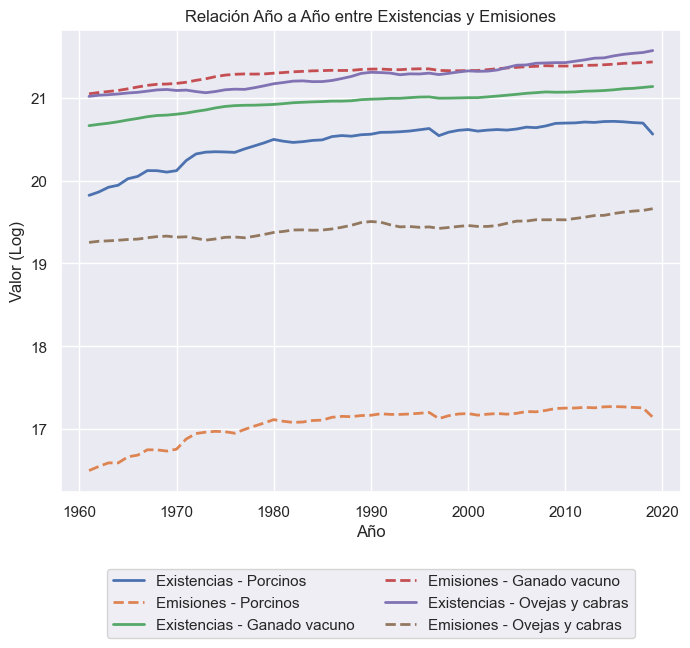

In [ ]:
# Combina los DataFrames por 'Producto' y 'Año'
df_combined = pd.merge(df_emisiones_mundo, df_existencia_mundo, on=['Producto', 'Año'], suffixes=('_emisiones', '_existencias'))

# Filtra los años para que no sean mayores a 2020
df_combined = df_combined[df_combined['Año'] <= 2020]

# Filtra los datos para los productos 'Porcinos' y 'Ganado vacuno'
df_selected = df_combined[df_combined['Producto'].isin(['Porcinos', 'Ganado vacuno', 'Ovejas y cabras'])]

# Calcula las transformaciones logarítmicas de los valores
df_selected = df_selected.copy()
df_selected['Valor_emisiones_log'] = np.log1p(df_selected['Valor_emisiones'])
df_selected['Valor_existencias_log'] = np.log1p(df_selected['Valor_existencias'])

# Grafica la relación año a año entre existencias y emisiones para 'Porcinos' y 'Ganado vacuno'
plt.figure(figsize=(8, 6))
for i, producto in enumerate(['Porcinos', 'Ganado vacuno', 'Ovejas y cabras']):
    df_producto = df_selected[df_selected['Producto'] == producto]
    años = df_producto['Año']
    emisiones_log = df_producto['Valor_emisiones_log']
    existencias_log = df_producto['Valor_existencias_log']
    
    estilo_existencias = '-'  # Línea continua para las existencias
    estilo_emisiones = '--'  # Línea punteada para las emisiones
    
    plt.plot(años, existencias_log, label=f'Existencias - {producto}', linestyle=estilo_existencias, linewidth=2)
    plt.plot(años, emisiones_log, label=f'Emisiones - {producto}', linestyle=estilo_emisiones, linewidth=2)

# Crear una nueva leyenda y colocarla en la parte inferior fuera del gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.title('Relación Año a Año entre Existencias y Emisiones')
plt.xlabel('Año')
plt.ylabel('Valor (Log)')
plt.show()

<p>En este gráfico podemos observar que el ganado porcino tiene una relación superior entre existencia y emisiones, seguido del ganado caprino/ovino donde la existencia está por encima de las emisiones y de último el ganado vacuno, donde las emisiones superan las existencias</p>

<p>Vamos a ver esta misma data en un gráfico de dispersión para ver si podemos entender mejor las relaciones entre existencia y emisiones</p>

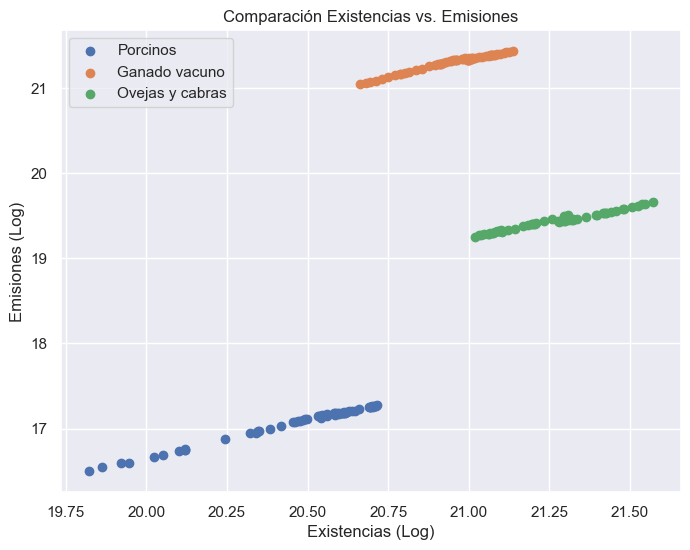

In [ ]:
# Combina los DataFrames por 'Producto' y 'Año'
df_combined = pd.merge(df_emisiones_mundo, df_existencia_mundo, on=['Producto', 'Año'], suffixes=('_emisiones', '_existencias'))

# Filtra los años para que no sean mayores a 2020
df_combined = df_combined[df_combined['Año'] <= 2020]

# Filtra los datos para los productos 'Porcinos' y 'Ganado vacuno'
df_selected = df_combined[df_combined['Producto'].isin(['Porcinos', 'Ganado vacuno', 'Ovejas y cabras'])]

# Calcula las transformaciones logarítmicas de los valores
df_selected = df_selected.copy()
df_selected['Valor_emisiones_log'] = np.log1p(df_selected['Valor_emisiones'])
df_selected['Valor_existencias_log'] = np.log1p(df_selected['Valor_existencias'])

# Grafica comparativamente las existencias y las emisiones para 'Porcinos' y 'Ganado vacuno'
plt.figure(figsize=(8, 6))

for producto in ['Porcinos', 'Ganado vacuno', 'Ovejas y cabras']:
    df_producto = df_selected[df_selected['Producto'] == producto]
    existencias_log = df_producto['Valor_existencias_log']
    emisiones_log = df_producto['Valor_emisiones_log']
    
    plt.scatter(existencias_log, emisiones_log, label=producto)

plt.title('Comparación Existencias vs. Emisiones')
plt.xlabel('Existencias (Log)')
plt.ylabel('Emisiones (Log)')
plt.legend()
plt.show()

<p>Con estos datos podríamos decir que la forma de aminorar la huella de carbono en los rebaños sería el aumento del ganado porcino y la disminución paulativa del ganado vacuno buscando su sustitución o bien por ganado porcino o por ganado ovino/caprino</p>

<h3><b>Intensidad</h3></b>

<p>Cuando hablamos de la intensidad de las emisiones estamos hablando básicamente de la proporción entre emisiones y producción. Antes habíamos analizado la producción de CH4 o CO2eq por cabeza de ganado de todos sus tipos, ahora vamos a analizar cual es la intensidad de esas emisiones, es decir, las emisiones por producto a consumir, en otras palabras, emisiones por kilo de carne y/o litro de leche.</p>

In [ ]:
df_oe = pd.read_csv('Data\MedioAmbiente_Intensidades_de_emisiónes_S_Todos_los_Datos_(Normalizado).csv', usecols=dfcol, encoding= 'ISO-8859-1')

In [ ]:
# Vamos a concentrarnos en el mundo
df_intensidad = df_oe[df_oe['Área'] == 'Mundo']

<p>Vamos a elegir los rubros de carne y de leche que vamos a analizar por separado</p>

In [ ]:
ls_carne =['Carne, ganado vacuno, fresca o refrigerada',
       'Carne de caprino, fresca o refrigerada', 
       'Carne de búfalo, fresca o refrigerada', 
       'Carne de ganado ovino, fresca o refrigerada',
       'Carne, cerdo, fresca o refrigerada']

ls_leche = ['Leche cruda de ganado bovino','Leche cruda de cabra',
            'Leche cruda de búfalo','Leche cruda de oveja',]


In [ ]:
df_intensidad_carne_mundo = df_intensidad[df_intensidad['Producto'].isin(ls_carne)]
df_intensidad_leche_mundo = df_intensidad[df_intensidad['Producto'].isin(ls_leche)]

In [ ]:
df_rel_carne_mundo = df_intensidad_carne_mundo[df_intensidad_carne_mundo['Unidad'] == 'kg CO2eq/kg product']
df_rel_leche_mundo = df_intensidad_leche_mundo[df_intensidad_leche_mundo['Unidad'] == 'kg CO2eq/kg product']

<h3><p>Carne</h3></p>

C:\Users\leo_r\AppData\Local\Temp\ipykernel_20996\4165389017.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resumido = df_rel_carne_mundo.groupby(['Año', 'Producto']).mean().reset_index()


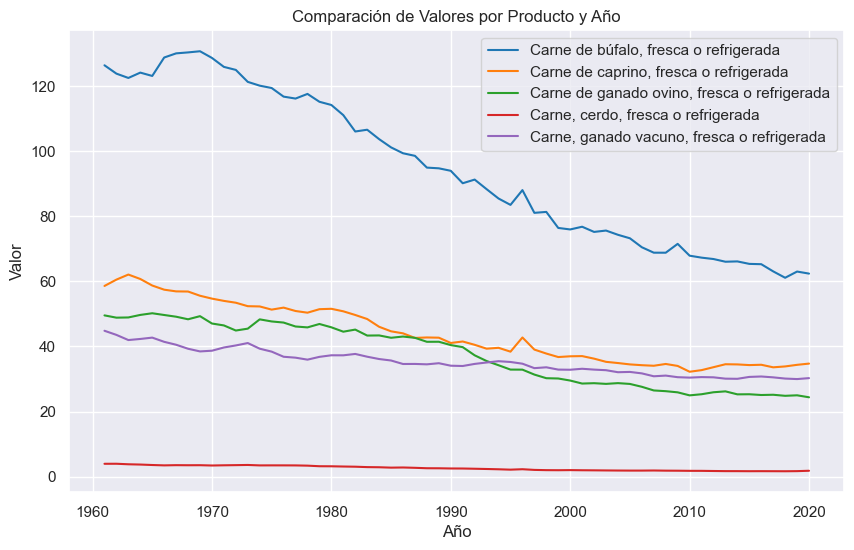

In [ ]:
# Agrupa y resume los datos por año y producto
df_resumido = df_rel_carne_mundo.groupby(['Año', 'Producto']).mean().reset_index()

# Obtiene la lista de productos únicos
productos_unicos = df_resumido['Producto'].unique()

# Configura los colores para cada producto
colores = plt.cm.tab10(range(len(productos_unicos)))

# Crea el gráfico de líneas
plt.figure(figsize=(10, 6))

# Itera sobre los productos y crea las líneas para cada producto
for i, producto in enumerate(productos_unicos):
    datos_producto = df_resumido[df_resumido['Producto'] == producto]
    años = datos_producto['Año']
    valores = datos_producto['Valor']
    plt.plot(años, valores, label=producto, color=colores[i % len(colores)])

plt.title('Comparación de Valores por Producto y Año')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

<p>En este gráfico comparativo podemos ver que la producción del ganado vacuno ha mejorado mucho y es casi equiparable al del ganado ovino o caprino. Esto tiene que ver básicamente con las mejoras de las especies en cuando a rendimiento por cabeza. Estos tres tipos de carne ya buscan cierta estabilización en la intensidad de las emisiones. La carne de búfalo es la de mayor huella de carbono genera a niveles de intensidad, pero muestra una tendencia a la baja y definitivamente la carne porcina ya ha llegado a un nivel de estabilidad difícil de igualar por los otros tipos de carne</p>

<h3><p>Leche</p></h3>

C:\Users\leo_r\AppData\Local\Temp\ipykernel_20996\937371288.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resumido = df_rel_leche_mundo.groupby(['Año', 'Producto']).mean().reset_index()


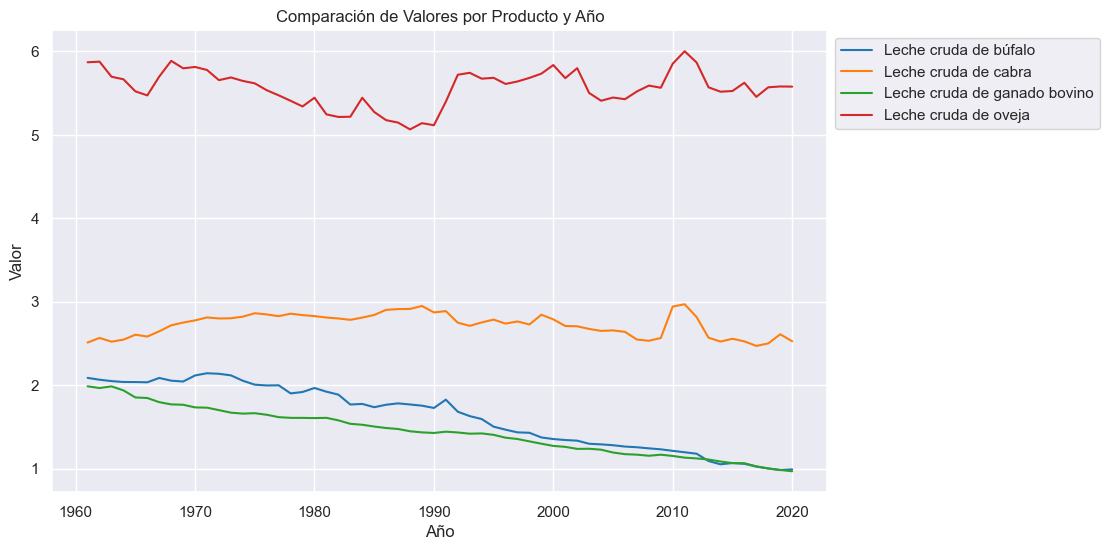

In [ ]:
# Agrupa y resume los datos por año y producto
df_resumido = df_rel_leche_mundo.groupby(['Año', 'Producto']).mean().reset_index()

# Obtiene la lista de productos únicos
productos_unicos = df_resumido['Producto'].unique()

# Configura los colores para cada producto
colores = plt.cm.tab10(range(len(productos_unicos)))

# Crea el gráfico de líneas
plt.figure(figsize=(10, 6))

# Itera sobre los productos y crea las líneas para cada producto
for i, producto in enumerate(productos_unicos):
    datos_producto = df_resumido[df_resumido['Producto'] == producto]
    años = datos_producto['Año']
    valores = datos_producto['Valor']
    plt.plot(años, valores, label=producto, color=colores[i % len(colores)])

plt.title('Comparación de Valores por Producto y Año')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

<p>En cuanto a la leche observamos que el rendimiento o la cantidad producida hacen que la leche de ganado bovino y de búfala tengan mejores prestaciones en comparación a la leche de cabra y vemos que la huella de carbono en la producción de leche de oveja es sumamente alta. Esto es porque el número de cabras y/o ovejas que se necesitan para igualar la producción de una vaca es muy alta</p>

<h2><b>Hipótesis</b></h2>

<ul><li>La disminución del ganado vacuno y su sustitución por ganado ovino/caprino pero sobre todo de ganado porcino generaría una disminución de la huella de carbono en la producción de carne </li>
    <li>Se debe mantener el rebaño de búfalas y vacas para la producción de leche, puesto que la sustitución por leche de oveja y/o cabra genera un costo muy alto en relación a la huella de carbono</li></ul>

<h3><b>Consideraciones</b></h3>

<ul><li>Se necesitan entre 2 y 3 cerdos para igualar la cantidad de carne producida por una vaca</li>
    <li>Se necesitan entre 10 y 11 ovejas/cabras para igualar la cantidad de carne producida por una vaca</li>
    <li>Se necesitan entre 12 y 15 ovejas para igualar la producción de leche de una vaca</li>
    <li>Se necesitan entre 9 y 11 cabras para igualar la producción de leche de una vaca</li></ul>

<p> Para tener en cuenta estas consideraciones vamos a sacar una relación entre las emisiones por cabeza de ganado de los 4 tipos de ganado que estamos evaluando. Una vez tengamos esa relación, vamos a multiplicar las emisiones por la cantidad de cabezas necesarias para igualar la producción de una res de ganado vacuno</p>

In [ ]:
# Lista de productos válidos
productos_validos = ['Ganado vacuno', 'Caprinos', 'Ovinos', 'Porcinos']

# Filtrar los datos de los DataFrames según los productos válidos
df_existencia_filtrado = df_existencia_mundo[df_existencia_mundo['Producto'].isin(productos_validos)]
df_emisiones_filtrado = df_emisiones_mundo[df_emisiones_mundo['Producto'].isin(productos_validos)]

# Combinar los datos en base a las columnas 'Año' y 'Producto'
df_relacion = pd.merge(df_existencia_filtrado, df_emisiones_filtrado, on=['Año', 'Producto'])

# Renombrar las columnas
df_relacion = df_relacion.rename(columns={'Valor_x': 'Existencia', 'Valor_y': 'Emisiones'})

# Seleccionar las columnas deseadas
df_relacion = df_relacion[['Año', 'Producto', 'Existencia', 'Emisiones']]

df_relacion['Relación'] = df_relacion['Emisiones']/df_relacion['Existencia']

df_relacion.head()


,Año,Producto,Existencia,Emisiones,Relación
0,1961,Caprinos,348623462.0,48807284.4,0.14
1,1962,Caprinos,363567061.0,50899388.4,0.14
2,1963,Caprinos,369761842.0,51766657.6,0.14
3,1964,Caprinos,368227998.0,51551920.0,0.14
4,1965,Caprinos,367341568.0,51427818.4,0.14


<p>Una vez sacada la relación por año vamos a tomar el promedio por Producto o tipo de ganado </p>

In [ ]:
# Agrupar los datos por tipo de producto y calcular el promedio de la columna 'Relación'
df_media_ganado = df_relacion.groupby('Producto')['Relación'].mean().reset_index()

# Renombrar las columnas
df_media_ganado = df_media_ganado.rename(columns={'Producto': 'Tipo de Producto', 'Relación': 'Promedio de Relación'})

# Verificar el resultado
print(df_media_ganado)

  Tipo de Producto  Promedio de Relación
0         Caprinos              0.140000
1    Ganado vacuno              1.417925
2           Ovinos              0.170514
3         Porcinos              0.033321


<p>Vamos a crear las columnas 'Carne' y 'Leche' y luego multiplicaremos el 'Promedio de Relación' por el factor de sustitución del ganado vacuno por algún otro tipo de ganado (porcino, ovino, caprino) y veremos si hay algún valor que indique que una sustitución por ese otro tipo de ganado generaría una mejora en la emisión de gases CO2eq</p>

In [ ]:
df_media_ganado['Carne'] = 0
df_media_ganado['Leche'] = 0


In [ ]:
# Definir una función para multiplicar los valores por un factor según el tipo de producto y el tipo de multiplicación
def multiplicar_valor(row, tipo):
    tipo_producto = row['Tipo de Producto']
    factor = 1  # Define aquí el factor correspondiente a cada tipo de producto
    
    if tipo == 'Carne':
        if tipo_producto == 'Caprinos' or tipo_producto == 'Ovinos':
            factor = 10.5
        if tipo_producto == 'Porcinos':
            factor = 2.5
    elif tipo == 'Leche':
        if tipo_producto == 'Caprinos':
            factor = 10
        if tipo_producto == 'Ovinos':
            factor = 13.5   
        if tipo_producto == 'Porcinos':
            factor = 0
    
    row[tipo] = row['Promedio de Relación'] * factor  # Multiplica el valor de 'Promedio de Relación' por el factor y asigna el resultado a la columna especificada
    
    return row

# Aplicar la función a cada fila del DataFrame para 'Carne'
df_media_ganado = df_media_ganado.apply(multiplicar_valor, axis=1, tipo='Carne')

# Aplicar la función a cada fila del DataFrame para 'Leche'
df_media_ganado = df_media_ganado.apply(multiplicar_valor, axis=1, tipo='Leche')

# Seleccionar el valor correspondiente a 'Ganado vacuno'
vacuno = df_media_ganado.loc[df_media_ganado['Tipo de Producto'] == 'Ganado vacuno', 'Promedio de Relación'].values[0]

# Seleccionar el valor correspondiente a 'Porcinos'
porcino = df_media_ganado.loc[df_media_ganado['Tipo de Producto'] == 'Porcinos', 'Promedio de Relación'].values[0]


# Dividimos tanto la columna de Carne y Leche por el valor de las emisiones por cabeza de ganado vacuno
df_media_ganado['Relación carne ganado vacuno'] = df_media_ganado['Carne'] / vacuno
df_media_ganado['Relación leche ganado vacuno'] = df_media_ganado['Leche'] / vacuno

print(df_media_ganado[['Tipo de Producto','Relación carne ganado vacuno', 'Relación leche ganado vacuno']])


  Tipo de Producto  Relación carne ganado vacuno  Relación leche ganado vacuno
0         Caprinos                      1.036726                      0.987358
1    Ganado vacuno                      1.000000                      1.000000
2           Ovinos                      1.262685                      1.623453
3         Porcinos                      0.058749                      0.000000


<h3><b>Conclusiones de la fase</b></h3>

<ul><li>La sustitución de ganado vacuno por ganado porcino en la producción de carne generaría un impacto sustancial en las emisiones de CO2eq</li>
<li>En relación a la producción de carne y leche las ovejas son más contaminantes que las vacas</li>
<li>Al menos en este estudio, la sustitución de ganado bovino por ganado caprino daría resultados marginales en las emisiones de CO2eq. Haría falta un estudio más a profundidad entre estas dos especies</li></ul>

<h2><b>Modelo</b></h2>

<p>Vamos a plantear un modelo donde vamos a disminuir la cantidad de ganado vacuno y aumentar la de porcino en una proporción de 1:2,5, es decir, por cada cabeza de ganado vacuno que disminuyamos vamos a aumentar 2,5 cabezas de ganado porcino y vamos a ver qué impacto tiene esto en las emisiones globales de CO2eq</p>

<h3><b>Consideraciones</h3></b>

<p>Vamos a hacer las modificaciones solo sobre el ganado destinado a la producción de carne, por lo tanto, debemos dejar intactos los rebaños para la producción de leche. Los rebaños de ganado porcino si no tienen ninguna consideración más allá del aumento 1:2,5 en relación al ganado vacuno</p>

<p>Primero vamos a generar el dataframe de producción original</p>

In [ ]:
# Lista de productos válidos
productos_validos = ['Vacunos, otros', 'Porcinos']

# Filtrar los datos de los DataFrames según los productos válidos
df_existencia_filtrado = df_existencia_mundo[df_existencia_mundo['Producto'].isin(productos_validos)]
df_emisiones_filtrado = df_emisiones_mundo[df_emisiones_mundo['Producto'].isin(productos_validos)]

# Combinar los datos en base a las columnas 'Año' y 'Producto'
df_produccion_original = pd.merge(df_existencia_filtrado, df_emisiones_filtrado, on=['Año', 'Producto'])

# Renombrar las columnas
df_produccion_original = df_produccion_original.rename(columns={'Valor_x': 'Existencia', 'Valor_y': 'Emisiones'})

# Seleccionar las columnas deseadas
df_produccion_original = df_produccion_original[['Año', 'Producto', 'Existencia', 'Emisiones']]

col = {'Año':'Año', 'Producto':'Ganado','Existencia':'Cabezas','Emisiones':'Emisiones'}
df_produccion_original = df_produccion_original.rename(columns=col)


df_produccion_original.head()

,Año,Ganado,Cabezas,Emisiones
0,1961,"Vacunos, otros",764790785.0,9.363940e+08
1,1962,"Vacunos, otros",780552222.0,9.597353e+08
2,1963,"Vacunos, otros",793217254.0,9.766724e+08
3,1964,"Vacunos, otros",811600992.0,9.982893e+08
4,1965,"Vacunos, otros",832065703.0,1.026511e+09


<p>Ahora vamos a generar los dataframes de producción simulada. Vamos a hacer varias simulaciones </p>

<p>Creamos una función para generar la variación de la producción y de las emisiones. Por cada cabeza de ganado vacuno para la producción de carne que disminuimos aumentamos 2,5 cabezas de ganado porcino. Tomamos el factor de emisiones por cabeza del ganado vacuno, lo disminuimos de sus emisiones y aumentamos las emisiones de ganado porcino por el número de cabezas aumentadas de ganado porcino</p>

In [ ]:
def simular_variacion(df, factor):
    df_simulado = df.copy()  # Copia el DataFrame original para no modificarlo directamente
    df_simulado = df_simulado.sort_values(['Año', 'Ganado'], ascending=[True, False])
    #años = set(df_simulado['Año'])
    años = set(df_simulado[df_simulado['Año'] >= 2000]['Año'])
    
    for año in años:
        reduccion_cabezas_v = 0  # Valor predeterminado
        cabezas_totales_v = 0 # Valor predeterminado
        reduccion_emisiones_v = 0 # Valor predeterminado
        aumento_cabezas_p = 0 # Valor predeterminado
        aumento_emisiones_p = 0 # Valor predeterminado
        df_año = df_simulado[df_simulado['Año'] == año]
        
        df_vacuno = df_año[df_año['Ganado'] == 'Vacunos, otros']
        if not df_vacuno.empty:
            cabezas_v = df_vacuno['Cabezas'].iat[0]
            emisiones_v = df_vacuno['Emisiones'].iat[0]
            cabezas_totales_v = math.ceil(cabezas_v * (1 - factor))
            reduccion_cabezas_v = cabezas_v - cabezas_totales_v
            reduccion_emisiones_v = math.ceil(emisiones_v - (reduccion_cabezas_v * vacuno))
            df_simulado.loc[(df_simulado['Año'] == año) & (df_simulado['Ganado'] == 'Vacunos, otros'), 'Cabezas'] = cabezas_totales_v
            df_simulado.loc[(df_simulado['Año'] == año) & (df_simulado['Ganado'] == 'Vacunos, otros'), 'Emisiones'] = reduccion_emisiones_v
        
        df_porcinos = df_año[df_año['Ganado'] == 'Porcinos']
        if not df_porcinos.empty:
            cabezas_p = df_porcinos['Cabezas'].iat[0]
            emisiones_p = df_porcinos['Emisiones'].iat[0]
            aumento_cabezas_p = math.ceil(reduccion_cabezas_v * 2.5) + cabezas_p
            aumento_emisiones_p = math.ceil(reduccion_cabezas_v * 2.5 * porcino) + emisiones_p
            df_simulado.loc[(df_simulado['Año'] == año) & (df_simulado['Ganado'] == 'Porcinos'), 'Cabezas'] = aumento_cabezas_p
            df_simulado.loc[(df_simulado['Año'] == año) & (df_simulado['Ganado'] == 'Porcinos'), 'Emisiones'] = aumento_emisiones_p
    
    df_simulado = df_simulado[df_simulado['Año'] <=2020].copy()
    return df_simulado


<p>Estos son los dataframes simulados</p>

In [ ]:
df_produccion_simulada_v1 = simular_variacion(df_produccion_original, 0.001) # Variación del 0,1%
df_produccion_simulada_v2 = simular_variacion(df_produccion_original, 0.005) # Variación del 0,5%
df_produccion_simulada_v3 = simular_variacion(df_produccion_original, 0.01) # Variación del 1%
df_produccion_simulada_v4 = simular_variacion(df_produccion_original, 0.025) # Variación del 2,5%
df_produccion_simulada_v5 = simular_variacion(df_produccion_original, 0.05) # Variación del 5%

<h3><b>Series temporales</h3></b>

<p><b>Modelo predictivo de series temporales donde vamos a comparar el modelo con la data real que tenemos de la FAO. Vamos a tomar la data real hasta 1999 y con eso vamos a entrenar el modelo para predecir las emisiones de CO2eq hasta 2019 y luego compararlo con la data real. Luego de esto procederemos a hacer lo mismo con las simulaciones para ver el impacto que supone un cambio en la producción de carne, sustituyendo carde vacuna por carne porcina </b></p>

In [ ]:
os.environ['CMDSTAN'] = 'path_to_cmdstan'  # Ruta a la carpeta de cmdstan

# Configurar el nivel de registro de cmdstanpy a WARNING
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)


<h3><b>Modelo con data real</b></h3>

In [ ]:
def prepara_data(df):
    df_emisiones_anuales = df.groupby('Año')['Emisiones'].sum().reset_index()
    # Filtrar el DataFrame original solo para los tipos de ganado especificados
    df_filt = df[df['Ganado'].isin(['Vacunos, otros', 'Porcinos'])]

    # Realizar la operación de pivote para obtener las columnas adicionales
    df_cabezas_por_ganado = df_filt.pivot(index='Año', columns='Ganado', values='Cabezas').reset_index()

    # Combinar los DataFrames 'df_emisiones_anuales' y 'df_cabezas_por_ganado' por la columna 'Año'
    df_emisiones_con_cabezas = df_emisiones_anuales.merge(df_cabezas_por_ganado, on='Año')

    df_emisiones_con_cabezas_r = df_emisiones_con_cabezas[df_emisiones_con_cabezas['Año'] <= 1999].copy()
    df_emisiones_con_cabezas_r['Año'] = pd.to_datetime(df_emisiones_con_cabezas_r['Año'], format='%Y')
    df_emisiones_con_cabezas_r = df_emisiones_con_cabezas_r.rename(columns={'Año':'ds', 'Emisiones':'y'})

    return df_emisiones_con_cabezas_r, df_emisiones_con_cabezas

In [ ]:
def plot_comparacion_forecast(forecast, titulo_label):
    # Crear figura y subparcelas con disposición horizontal
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Configurar el primer gráfico en la primera subparcela
    axs[0].plot(forecast['Año'], forecast['Emisiones'], label='Emisiones reales')
    axs[0].plot(forecast['Año'], forecast['yhat'], label=titulo_label)
    axs[0].set_xlabel('Año')
    axs[0].set_ylabel('Valores')
    axs[0].set_title('Comparación de Emisiones reales vs ' + titulo_label)
    axs[0].legend()

    # Configurar el segundo gráfico en la segunda subparcela
    axs[1].plot(forecast[forecast['Año'] >= 2000]['Año'],
                forecast[forecast['Año'] >= 2000]['Emisiones'],
                label='Emisiones reales')
    axs[1].plot(forecast[forecast['Año'] >= 2000]['Año'],
                forecast[forecast['Año'] >= 2000]['yhat'],
                label=titulo_label)
    axs[1].set_xlabel('Año')
    axs[1].set_ylabel('Valores')
    axs[1].set_title('Comparación de Emisiones reales vs ' + titulo_label + ' (a partir del año 2000)')
    axs[1].legend()

    # Ajustar la disposición de los gráficos
    plt.tight_layout()

    # Mostrar el mosaico de gráficos
    plt.show()


In [ ]:
# Se suman las emisiones de todos los tipos de ganado que hay
df_emisiones_anuales = df_produccion_original.groupby('Año')['Emisiones'].sum().reset_index()

In [ ]:
# Filtrar el DataFrame original solo para los tipos de ganado especificados
df_filt = df_produccion_original[df_produccion_original['Ganado'].isin(['Vacunos, otros', 'Porcinos'])]

# Realizar la operación de pivote para obtener las columnas adicionales
df_cabezas_por_ganado = df_filt.pivot(index='Año', columns='Ganado', values='Cabezas').reset_index()

# Combinar los DataFrames 'df_emisiones_anuales' y 'df_cabezas_por_ganado' por la columna 'Año'
df_emisiones_con_cabezas = df_emisiones_anuales.merge(df_cabezas_por_ganado, on='Año')

# Verificar el DataFrame resultante
print(df_emisiones_con_cabezas)

     Año     Emisiones      Porcinos  Vacunos, otros
0   1961  9.510376e+08  4.061229e+08    7.647908e+08
1   1962  9.751281e+08  4.229060e+08    7.805522e+08
2   1963  9.927395e+08  4.477996e+08    7.932173e+08
3   1964  1.014348e+09  4.590009e+08    8.116010e+08
4   1965  1.043799e+09  4.963576e+08    8.320657e+08
..   ...           ...           ...             ...
56  2017  1.523987e+09  9.772529e+08    1.206872e+09
57  2018  1.547455e+09  9.715024e+08    1.229669e+09
58  2019  1.560622e+09  8.504092e+08    1.245850e+09
59  2030  1.718449e+09  1.089624e+09    1.342947e+09
60  2050  1.893683e+09  1.157741e+09    1.491880e+09

[61 rows x 4 columns]


In [ ]:
df_emisiones_con_cabezas = df_emisiones_con_cabezas[df_emisiones_con_cabezas['Año'] <= 2020]
df_emisiones_con_cabezas_r = df_emisiones_con_cabezas[df_emisiones_con_cabezas['Año'] <= 1999].copy()

In [ ]:
df_emisiones_con_cabezas_r['Año'] = pd.to_datetime(df_emisiones_con_cabezas_r['Año'], format='%Y')
df_emisiones_con_cabezas_r = df_emisiones_con_cabezas_r.rename(columns={'Año':'ds', 'Emisiones':'y'})

<p> Una vez preparada la data vamos a entrenar el modelo. Vamos a usar como variables exógenas las existencias de las cabezas de cada uno de los tres tipos de ganado que estamos analizando </p>

18:36:29 - cmdstanpy - INFO - Chain [1] start processing
18:36:29 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/8 [00:00<?, ?it/s]

18:36:29 - cmdstanpy - INFO - Chain [1] start processing
18:36:38 - cmdstanpy - INFO - Chain [1] done processing
18:36:39 - cmdstanpy - INFO - Chain [1] start processing
18:36:50 - cmdstanpy - INFO - Chain [1] done processing
18:36:51 - cmdstanpy - INFO - Chain [1] start processing
18:36:51 - cmdstanpy - INFO - Chain [1] done processing
18:36:51 - cmdstanpy - INFO - Chain [1] start processing
18:37:04 - cmdstanpy - INFO - Chain [1] done processing
18:37:04 - cmdstanpy - INFO - Chain [1] start processing
18:37:04 - cmdstanpy - INFO - Chain [1] done processing
18:37:04 - cmdstanpy - INFO - Chain [1] start processing
18:37:05 - cmdstanpy - INFO - Chain [1] done processing
18:37:05 - cmdstanpy - INFO - Chain [1] start processing
18:37:05 - cmdstanpy - INFO - Chain [1] done processing
18:37:05 - cmdstanpy - INFO - Chain [1] start processing
18:37:06 - cmdstanpy - INFO - Chain [1] done processing


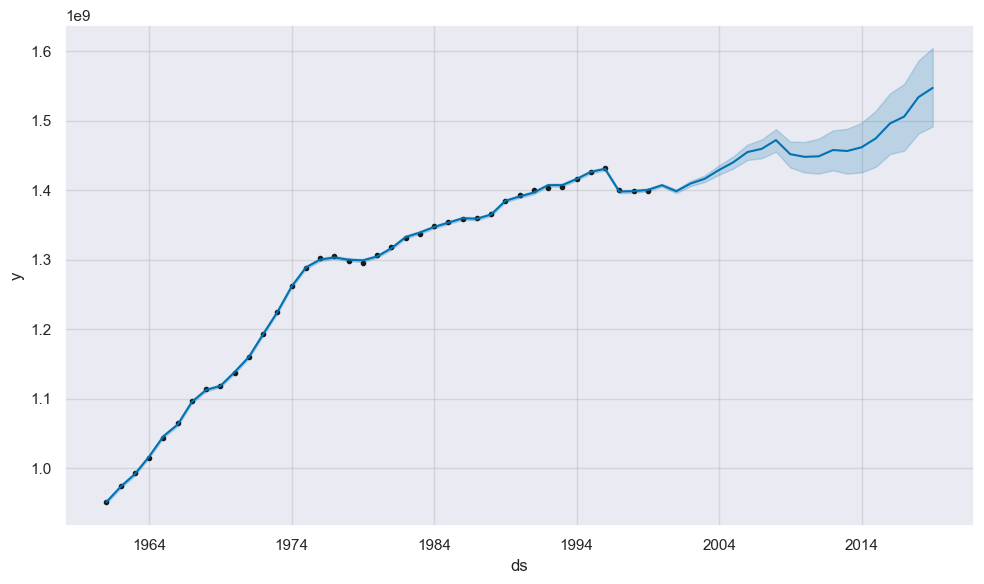

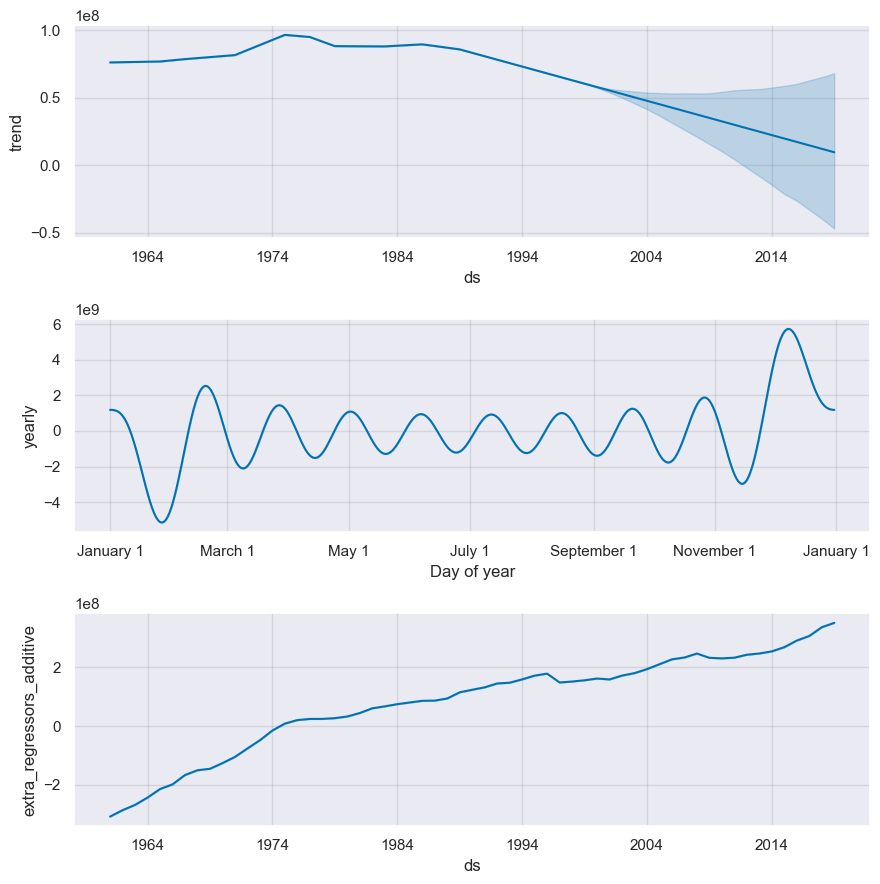

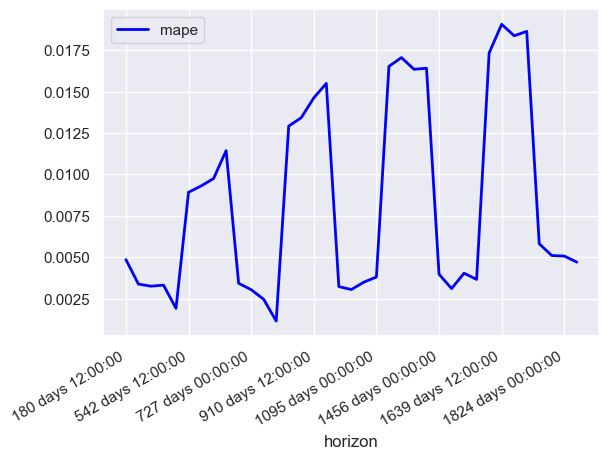

In [ ]:
# Creamos el modelo
modelo_original = Prophet()

# Proporcionamos las variables exógenas
modelo_original.add_regressor('Porcinos')
modelo_original.add_regressor('Vacunos, otros')

# Entrenamos el modelo
modelo_original.fit(df_emisiones_con_cabezas_r)

# Hacemos las predicciones
futuro_original = modelo_original.make_future_dataframe(periods=20, freq='Y')
futuro_original['Porcinos'] = df_emisiones_con_cabezas['Porcinos']
futuro_original['Vacunos, otros'] = df_emisiones_con_cabezas['Vacunos, otros']
forecast_original = modelo_original.predict(futuro_original)

# Validación cruzada de la data y generación de gráficos
df_cv = cross_validation(modelo_original, horizon = '1825 days')
df_p = performance_metrics(df_cv)
fig = modelo_original.plot(forecast_original)
fig2 = modelo_original.plot_components(forecast_original)
df_p.plot(x='horizon', y='mape', color='blue', linewidth=2)
plt.show()

In [ ]:
valores_reales_año = df_emisiones_con_cabezas['Año']
valores_reales_emisiones = df_emisiones_con_cabezas['Emisiones']

In [ ]:
forecast_original['Año'] = valores_reales_año
forecast_original['Emisiones'] = valores_reales_emisiones


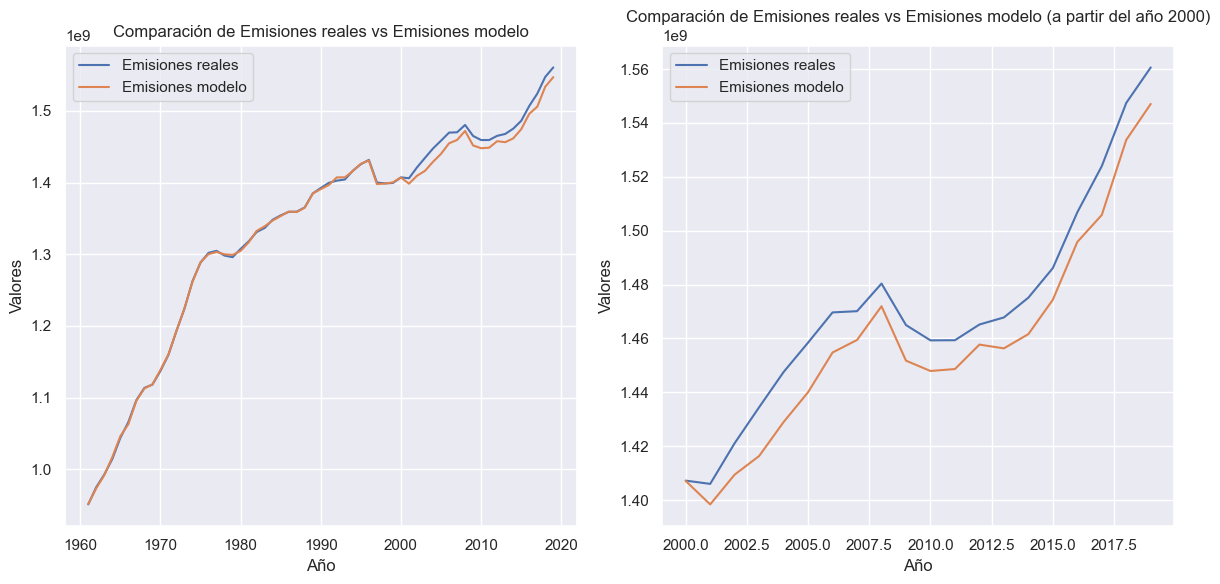

In [ ]:
plot_comparacion_forecast(forecast_original, 'Emisiones modelo')

<p>En el gráfico anterior podemos ver que el modelo se ajusta bien a la data real</p>

<h3><b>Primer modelo con data simulada. Disminución del 0,1% de la producción de carne vacuna y aumento en proporción 1:2,5 de la producción de carne porcina </b><h3>

In [ ]:
df_emisiones_simuladas_v1_r, df_emisiones_simuladas_v1 = prepara_data(df_produccion_simulada_v1)

In [ ]:
# Creamos el modelo
modelo_simulacion_1 = Prophet()

# Proporcionamos las variables exógenas
modelo_simulacion_1.add_regressor('Porcinos')
modelo_simulacion_1.add_regressor('Vacunos, otros')

# Entrenamos el modelo
modelo_simulacion_1.fit(df_emisiones_simuladas_v1_r)

# Hacemos las predicciones
futuro_simulacion_1 = modelo_simulacion_1.make_future_dataframe(periods=20, freq='Y')
futuro_simulacion_1['Porcinos'] = df_emisiones_simuladas_v1['Porcinos']
futuro_simulacion_1['Vacunos, otros'] = df_emisiones_simuladas_v1['Vacunos, otros']
forecast_simulacion_1 = modelo_simulacion_1.predict(futuro_simulacion_1)

# Validación cruzada de la data y generación de gráficos
df_cv = cross_validation(modelo_simulacion_1, horizon = '1825 days')
df_p = performance_metrics(df_cv)
#fig = modelo_simulacion_1.plot(forecast_simulacion_1)
#fig2 = modelo_simulacion_1.plot_components(forecast_simulacion_1)
#df_p.plot(x='horizon', y='mape', color='blue', linewidth=2)
#plt.show()

18:37:08 - cmdstanpy - INFO - Chain [1] start processing
18:37:08 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/8 [00:00<?, ?it/s]

18:37:08 - cmdstanpy - INFO - Chain [1] start processing
18:37:18 - cmdstanpy - INFO - Chain [1] done processing
18:37:18 - cmdstanpy - INFO - Chain [1] start processing
18:37:29 - cmdstanpy - INFO - Chain [1] done processing
18:37:29 - cmdstanpy - INFO - Chain [1] start processing
18:37:29 - cmdstanpy - INFO - Chain [1] done processing
18:37:29 - cmdstanpy - INFO - Chain [1] start processing
18:37:42 - cmdstanpy - INFO - Chain [1] done processing
18:37:42 - cmdstanpy - INFO - Chain [1] start processing
18:37:42 - cmdstanpy - INFO - Chain [1] done processing
18:37:43 - cmdstanpy - INFO - Chain [1] start processing
18:37:43 - cmdstanpy - INFO - Chain [1] done processing
18:37:43 - cmdstanpy - INFO - Chain [1] start processing
18:37:43 - cmdstanpy - INFO - Chain [1] done processing
18:37:43 - cmdstanpy - INFO - Chain [1] start processing
18:37:44 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
forecast_simulacion_1['Año'] = valores_reales_año
forecast_simulacion_1['Emisiones'] = valores_reales_emisiones

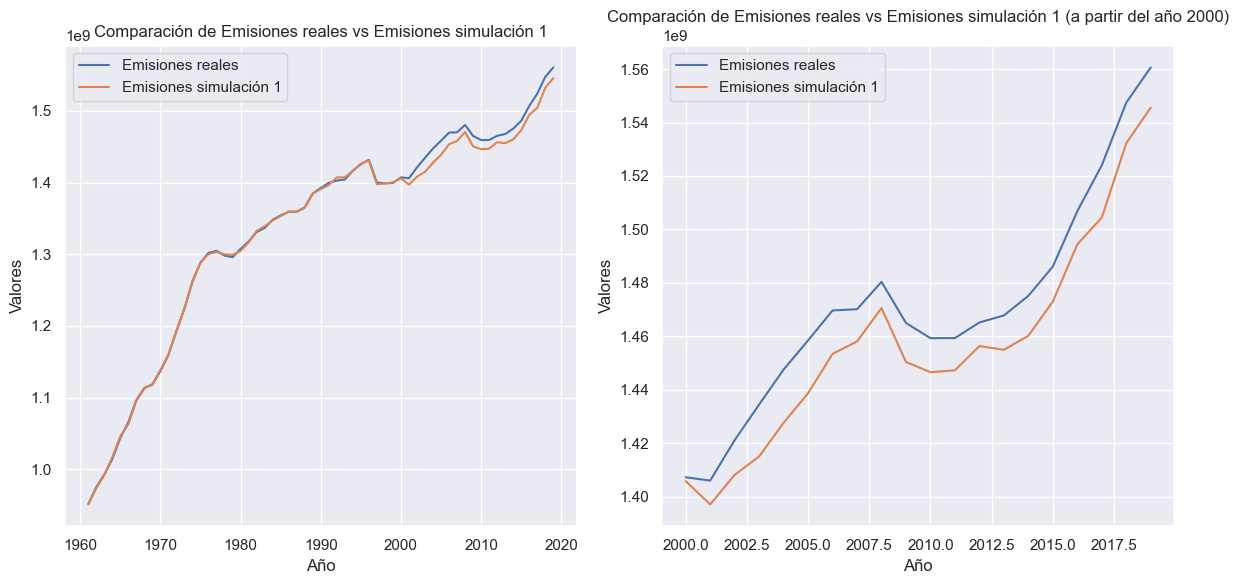

In [ ]:
plot_comparacion_forecast(forecast_simulacion_1, 'Emisiones simulación 1')

<h3><b>Segundo modelo con data simulada. Disminución del 0,5% de la producción de carne vacuna y aumento en proporción 1:2,5 de la producción de carne porcina </b><h3>

In [ ]:
df_emisiones_simuladas_v2_r, df_emisiones_simuladas_v2 = prepara_data(df_produccion_simulada_v2)

In [ ]:
# Creamos el modelo
modelo_simulacion_2 = Prophet()

# Proporcionamos las variables exógenas
modelo_simulacion_2.add_regressor('Porcinos')
modelo_simulacion_2.add_regressor('Vacunos, otros')

# Entrenamos el modelo
modelo_simulacion_2.fit(df_emisiones_simuladas_v2_r)

# Hacemos las predicciones
futuro_simulacion_2 = modelo_simulacion_2.make_future_dataframe(periods=20, freq='Y')
futuro_simulacion_2['Porcinos'] = df_emisiones_simuladas_v2['Porcinos']
futuro_simulacion_2['Vacunos, otros'] = df_emisiones_simuladas_v2['Vacunos, otros']
forecast_simulacion_2 = modelo_simulacion_2.predict(futuro_simulacion_2)

# Validación cruzada de la data y generación de gráficos
df_cv = cross_validation(modelo_simulacion_2, horizon = '1825 days')
df_p = performance_metrics(df_cv)
#fig = modelo_simulacion_1.plot(forecast_simulacion_1)
#fig2 = modelo_simulacion_1.plot_components(forecast_simulacion_1)
#df_p.plot(x='horizon', y='mape', color='blue', linewidth=2)
#plt.show()

18:37:45 - cmdstanpy - INFO - Chain [1] start processing
18:37:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/8 [00:00<?, ?it/s]

18:37:45 - cmdstanpy - INFO - Chain [1] start processing
18:37:55 - cmdstanpy - INFO - Chain [1] done processing
18:37:55 - cmdstanpy - INFO - Chain [1] start processing
18:38:06 - cmdstanpy - INFO - Chain [1] done processing
18:38:06 - cmdstanpy - INFO - Chain [1] start processing
18:38:06 - cmdstanpy - INFO - Chain [1] done processing
18:38:06 - cmdstanpy - INFO - Chain [1] start processing
18:38:20 - cmdstanpy - INFO - Chain [1] done processing
18:38:20 - cmdstanpy - INFO - Chain [1] start processing
18:38:20 - cmdstanpy - INFO - Chain [1] done processing
18:38:21 - cmdstanpy - INFO - Chain [1] start processing
18:38:21 - cmdstanpy - INFO - Chain [1] done processing
18:38:21 - cmdstanpy - INFO - Chain [1] start processing
18:38:21 - cmdstanpy - INFO - Chain [1] done processing
18:38:21 - cmdstanpy - INFO - Chain [1] start processing
18:38:22 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
forecast_simulacion_2['Año'] = valores_reales_año
forecast_simulacion_2['Emisiones'] = valores_reales_emisiones

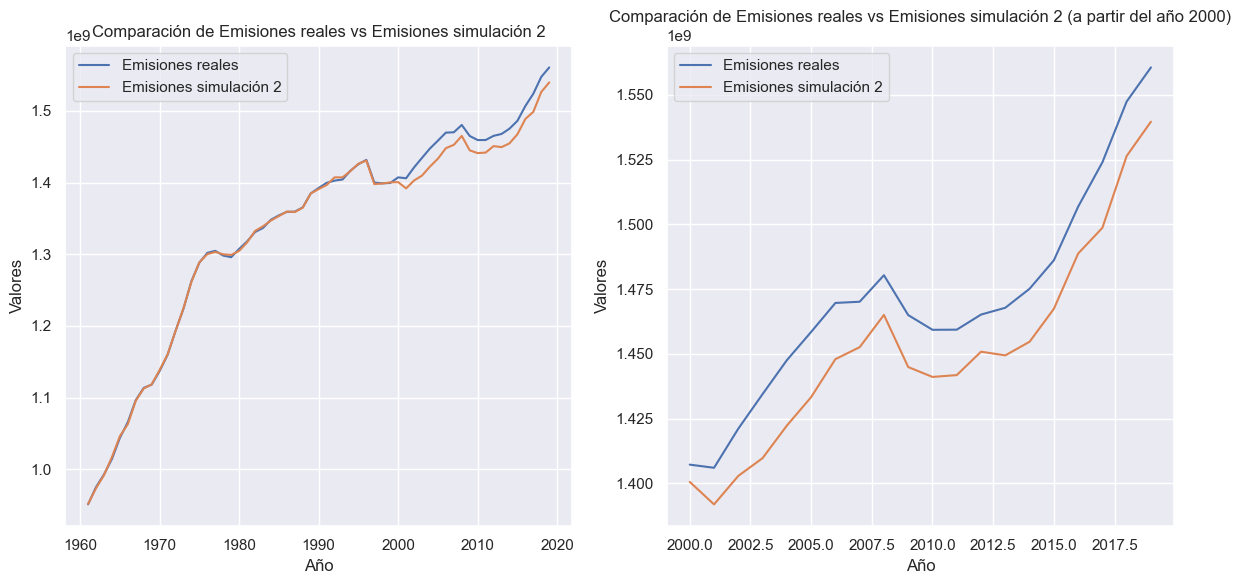

In [ ]:
plot_comparacion_forecast(forecast_simulacion_2, 'Emisiones simulación 2')

<h3><b>Tercer modelo con data simulada. Disminución del 1% de la producción de carne vacuna y aumento en proporción 1:2,5 de la producción de carne porcina </b><h3>

In [ ]:
df_emisiones_simuladas_v3_r, df_emisiones_simuladas_v3 = prepara_data(df_produccion_simulada_v3)

In [ ]:
# Creamos el modelo
modelo_simulacion_3 = Prophet()

# Proporcionamos las variables exógenas
modelo_simulacion_3.add_regressor('Porcinos')
modelo_simulacion_3.add_regressor('Vacunos, otros')

# Entrenamos el modelo
modelo_simulacion_3.fit(df_emisiones_simuladas_v3_r)

# Hacemos las predicciones
futuro_simulacion_3 = modelo_simulacion_3.make_future_dataframe(periods=20, freq='Y')
futuro_simulacion_3['Porcinos'] = df_emisiones_simuladas_v3['Porcinos']
futuro_simulacion_3['Vacunos, otros'] = df_emisiones_simuladas_v3['Vacunos, otros']
forecast_simulacion_3 = modelo_simulacion_3.predict(futuro_simulacion_3)

# Validación cruzada de la data y generación de gráficos
df_cv = cross_validation(modelo_simulacion_3, horizon = '1825 days')
df_p = performance_metrics(df_cv)
#fig = modelo_simulacion_1.plot(forecast_simulacion_1)
#fig2 = modelo_simulacion_1.plot_components(forecast_simulacion_1)
#df_p.plot(x='horizon', y='mape', color='blue', linewidth=2)
#plt.show()

18:38:23 - cmdstanpy - INFO - Chain [1] start processing
18:38:24 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/8 [00:00<?, ?it/s]

18:38:24 - cmdstanpy - INFO - Chain [1] start processing
18:38:34 - cmdstanpy - INFO - Chain [1] done processing
18:38:34 - cmdstanpy - INFO - Chain [1] start processing
18:38:50 - cmdstanpy - INFO - Chain [1] done processing
18:38:50 - cmdstanpy - INFO - Chain [1] start processing
18:38:50 - cmdstanpy - INFO - Chain [1] done processing
18:38:50 - cmdstanpy - INFO - Chain [1] start processing
18:39:08 - cmdstanpy - INFO - Chain [1] done processing
18:39:08 - cmdstanpy - INFO - Chain [1] start processing
18:39:08 - cmdstanpy - INFO - Chain [1] done processing
18:39:08 - cmdstanpy - INFO - Chain [1] start processing
18:39:10 - cmdstanpy - INFO - Chain [1] done processing
18:39:10 - cmdstanpy - INFO - Chain [1] start processing
18:39:10 - cmdstanpy - INFO - Chain [1] done processing
18:39:10 - cmdstanpy - INFO - Chain [1] start processing
18:39:10 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
forecast_simulacion_3['Año'] = valores_reales_año
forecast_simulacion_3['Emisiones'] = valores_reales_emisiones

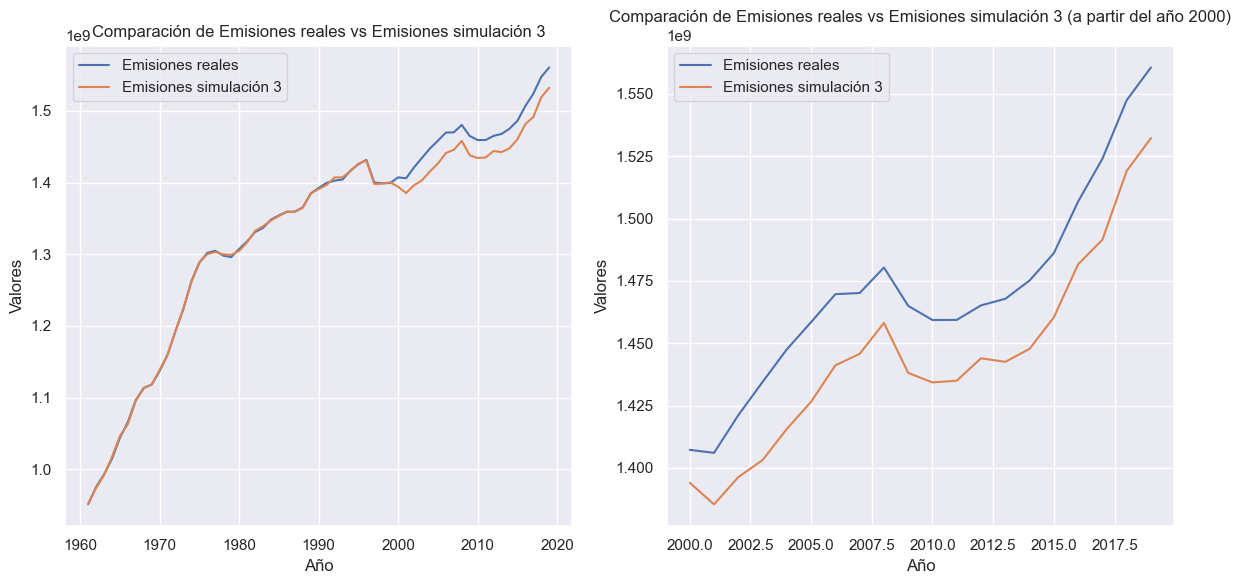

In [ ]:
plot_comparacion_forecast(forecast_simulacion_3, 'Emisiones simulación 3')

<h3><b>Cuarto modelo con data simulada. Disminución del 2,5% de la producción de carne vacuna y aumento en proporción 1:2,5 de la producción de carne porcina </b><h3>

In [ ]:
df_emisiones_simuladas_v4_r, df_emisiones_simuladas_v4 = prepara_data(df_produccion_simulada_v4)

In [ ]:
# Creamos el modelo
modelo_simulacion_4 = Prophet()

# Proporcionamos las variables exógenas
modelo_simulacion_4.add_regressor('Porcinos')
modelo_simulacion_4.add_regressor('Vacunos, otros')

# Entrenamos el modelo
modelo_simulacion_4.fit(df_emisiones_simuladas_v4_r)

# Hacemos las predicciones
futuro_simulacion_4 = modelo_simulacion_3.make_future_dataframe(periods=20, freq='Y')
futuro_simulacion_4['Porcinos'] = df_emisiones_simuladas_v4['Porcinos']
futuro_simulacion_4['Vacunos, otros'] = df_emisiones_simuladas_v4['Vacunos, otros']
forecast_simulacion_4 = modelo_simulacion_4.predict(futuro_simulacion_4)

# Validación cruzada de la data y generación de gráficos
df_cv = cross_validation(modelo_simulacion_4, horizon = '1825 days')
df_p = performance_metrics(df_cv)
# fig = modelo_simulacion_4.plot(forecast_simulacion_4)
# fig2 = modelo_simulacion_4.plot_components(forecast_simulacion_4)
# df_p.plot(x='horizon', y='mape', color='blue', linewidth=2)
# plt.show()

18:39:13 - cmdstanpy - INFO - Chain [1] start processing
18:39:13 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/8 [00:00<?, ?it/s]

18:39:13 - cmdstanpy - INFO - Chain [1] start processing
18:39:23 - cmdstanpy - INFO - Chain [1] done processing
18:39:23 - cmdstanpy - INFO - Chain [1] start processing
18:39:38 - cmdstanpy - INFO - Chain [1] done processing
18:39:38 - cmdstanpy - INFO - Chain [1] start processing
18:39:38 - cmdstanpy - INFO - Chain [1] done processing
18:39:39 - cmdstanpy - INFO - Chain [1] start processing
18:39:55 - cmdstanpy - INFO - Chain [1] done processing
18:39:55 - cmdstanpy - INFO - Chain [1] start processing
18:39:55 - cmdstanpy - INFO - Chain [1] done processing
18:39:55 - cmdstanpy - INFO - Chain [1] start processing
18:39:55 - cmdstanpy - INFO - Chain [1] done processing
18:39:55 - cmdstanpy - INFO - Chain [1] start processing
18:39:55 - cmdstanpy - INFO - Chain [1] done processing
18:39:56 - cmdstanpy - INFO - Chain [1] start processing
18:39:56 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
forecast_simulacion_4['Año'] = valores_reales_año
forecast_simulacion_4['Emisiones'] = valores_reales_emisiones

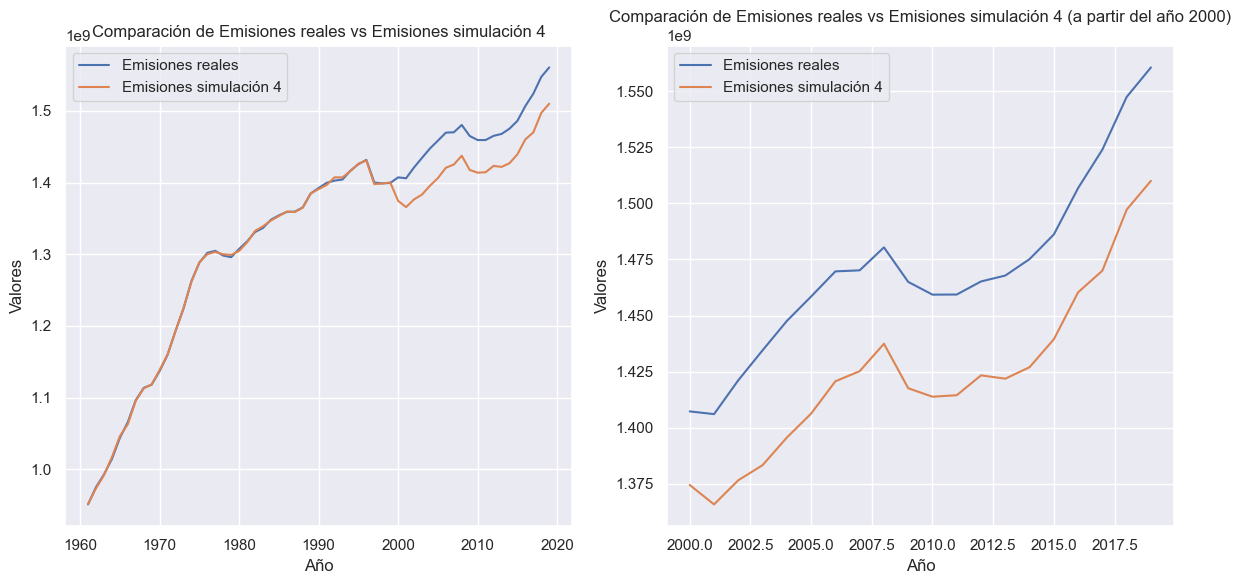

In [ ]:
plot_comparacion_forecast(forecast_simulacion_4, 'Emisiones simulación 4')

<h3><b>Quinto modelo con data simulada. Disminución del 5% de la producción de carne vacuna y aumento en proporción 1:2,5 de la producción de carne porcina </b><h3>

In [ ]:
df_emisiones_simuladas_v5_r, df_emisiones_simuladas_v5 = prepara_data(df_produccion_simulada_v5)

In [ ]:
# Creamos el modelo
modelo_simulacion_5 = Prophet()

# Proporcionamos las variables exógenas
modelo_simulacion_5.add_regressor('Porcinos')
modelo_simulacion_5.add_regressor('Vacunos, otros')

# Entrenamos el modelo
modelo_simulacion_5.fit(df_emisiones_simuladas_v5_r)

# Hacemos las predicciones
futuro_simulacion_5 = modelo_simulacion_5.make_future_dataframe(periods=20, freq='Y')
futuro_simulacion_5['Porcinos'] = df_emisiones_simuladas_v5['Porcinos']
futuro_simulacion_5['Vacunos, otros'] = df_emisiones_simuladas_v5['Vacunos, otros']
forecast_simulacion_5 = modelo_simulacion_5.predict(futuro_simulacion_5)

# Validación cruzada de la data y generación de gráficos
df_cv = cross_validation(modelo_simulacion_5, horizon = '1825 days')
df_p = performance_metrics(df_cv)
# fig = modelo_simulacion_4.plot(forecast_simulacion_4)
# fig2 = modelo_simulacion_4.plot_components(forecast_simulacion_4)
# df_p.plot(x='horizon', y='mape', color='blue', linewidth=2)
# plt.show()

18:39:57 - cmdstanpy - INFO - Chain [1] start processing
18:39:57 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/8 [00:00<?, ?it/s]

18:39:57 - cmdstanpy - INFO - Chain [1] start processing
18:40:07 - cmdstanpy - INFO - Chain [1] done processing
18:40:07 - cmdstanpy - INFO - Chain [1] start processing
18:40:18 - cmdstanpy - INFO - Chain [1] done processing
18:40:19 - cmdstanpy - INFO - Chain [1] start processing
18:40:19 - cmdstanpy - INFO - Chain [1] done processing
18:40:19 - cmdstanpy - INFO - Chain [1] start processing
18:40:33 - cmdstanpy - INFO - Chain [1] done processing
18:40:33 - cmdstanpy - INFO - Chain [1] start processing
18:40:34 - cmdstanpy - INFO - Chain [1] done processing
18:40:34 - cmdstanpy - INFO - Chain [1] start processing
18:40:34 - cmdstanpy - INFO - Chain [1] done processing
18:40:34 - cmdstanpy - INFO - Chain [1] start processing
18:40:34 - cmdstanpy - INFO - Chain [1] done processing
18:40:34 - cmdstanpy - INFO - Chain [1] start processing
18:40:35 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
forecast_simulacion_5['Año'] = valores_reales_año
forecast_simulacion_5['Emisiones'] = valores_reales_emisiones

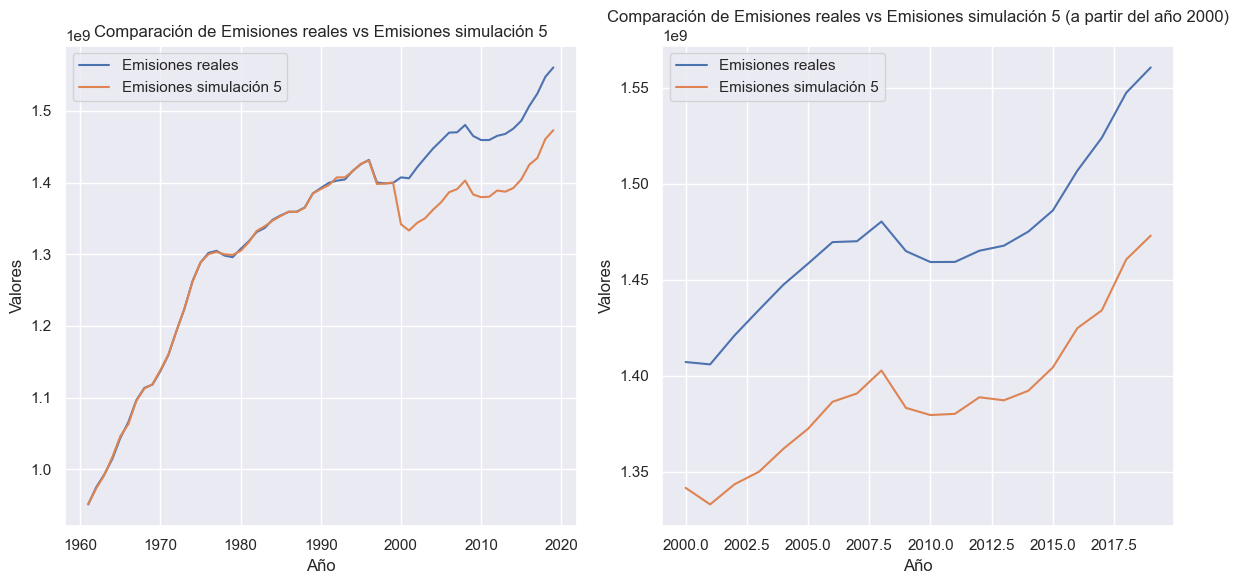

In [ ]:
plot_comparacion_forecast(forecast_simulacion_5, 'Emisiones simulación 5')

<h3><b>Conclusiones de las simulaciones</h3></b>
<p>En las diferentes simulaciones podemos ver que la disminución de las emisiones por fermentación entérica con la sustitución de ganado vacuno por ganado porcino es practicamente lineal con el porcentaje de sustitución. De esta manera una disminución del 0,1% o del 5% en la población de los rebaños de ganado vacuno sustituyéndolos en relación 1:2,5 por ganado porcino representa técnicamente una reducción de la misma magnitud en las emisiones de CH4 o de CO2eq.</p>

<h2><b>Conclusiones </h2></b>

<ul><li>Aunque en la producción agrícola, el arroz es el que más emisiones produce en comparación con otros cereales, una disminución en su producción no genera cambios sustanciales en sus emisiones</li>
<li>El ganado vacuno es por mucho el que más emisiones de CO2eq genera. Aunque las cabras y las ovejas generan menos emisiones por cabeza, el rendimiento de su carne no da para compensar la sustitución de la carne de vacuno por la carne caprina u ovina</li>
<li>El ganado porcino se presenta como el principal reemplazo en la producción de carne. Al no ser un rumiante, su producción de CH4 producto de la fermentación entérica es mucho menor. Se necesitan en torno a 2 o 3 cerdos para igualar el rendimiento de una res, por lo que por cada cabeza de res menos son necesarias 2,5 cabezas de cerdo más</li>
<li>No es concluyente la sustitución de la leche de ganado vacuno por la leche de ganado caprino, debería ser producto de otro análisis más exhaustivo. Sin embargo, si se demostró que en la producción de leche no es una opción viable el cambio de la leche de vaca por la leche de oveja porque se emitirían más emisiones que con el ganado vacuno</li>
</ul>

<h2><b>Otras consideraciones y recomendaciones</b></h2>

<ul><li>Se puede hacer un análisis más exhaustivo tomando en cuenta diversas razas de ganado vacuno, caprino, ovino y porcino, porque los datos pueden variar si se observan solamente razas especializadas en cierto tipo de producción</li>
<li>Hay que tomar en cuenta el factor de la demanda. Por razones culturales no todas las personas estarían dispuestas a cambiar el ganado vacuno por porcino. El sabor de la carne porcina y vacuna son muy diferentes y eso es un factor también a tomar en cuenta</li>
<li>Se puede hacer un análisis tomando en consideración otros tipos de proteína animal como las aves y/o los peces</li>
<li>La calidad y el sabor de los diferentes tipos de carne también influyen en la demanda por parte de la población</li>
<li>Se recomienda hacer un estudio sobre la insidencia de enfermedades como la diábetes tipo 2 tomando en cuenta el aumento de la producción de cereales, especialmente el arroz</li></ul>